In [9]:
# Dependencies
import pandas as pd
from pathlib import Path
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Import U.S. Census API Key
from config import api_key
if api_key == "YOUR KEY HERE":
    print("Please edit your config.py file.")

In [13]:
# Save path to the full data as a variable
full_data_file = Path("Resources/full_worker_set.csv")

dtype_defined = {
    "State": "object",
    "Work From Home 1": "object",
    "Work From Home 2": "object",
    "Work From Home 3": "object",
    "Work From Home 4": "object",
    "Work From Home 5": "object",
    "Work From Home 6": "object",
    "Home Days 1": "Int64",
    "Home Days 2": "Int64",
    "Home Days 3": "Int64",
    "Home Days 4": "Int64",
    "Home Days 5": "Int64",
    "Home Days 6": "Int64",  
    "Income 1.1": "float64",
    "Income 1.2": "float64",
    "Income 1.3": "float64",
    "Income 2.1": "float64",
    "Income 2.2": "float64",
    "Income 2.3": "float64",
    "Income 3.1": "float64",
    "Income 3.2": "float64",
    "Income 3.3": "float64",
    "Income 4.1": "float64",
    "Income 4.2": "float64",
    "Income 5.1": "float64",
    "Income 6.1": "float64",
    "Hourly 1.1": "float64",
    "Hourly 1.2": "float64",
    "Hourly 1.3": "float64",
    "Hourly 2.1": "float64",
    "Hourly 2.2": "float64",
    "Hourly 2.3": "float64",
    "Hourly 3.1": "float64",
    "Hourly 3.2": "float64",
    "Hourly 3.3": "float64",
    "Hourly 4.1": "float64",
    "Hourly 4.2": "float64",
    "Hourly 5.1": "float64",
    "Hourly 5.2": "float64",
    "Weekly 1.1": "float64",
    "Weekly 1.2": "float64",
    "Weekly 1.3": "float64",
    "Weekly 2.1": "float64",
    "Weekly 2.2": "float64",
    "Weekly 2.3": "float64",
    "Weekly 3.1": "float64",
    "Weekly 3.2": "float64",
    "Weekly 4.1": "float64",
    "Weekly 5.2": "float64",
    "Biweekly 1.1": "float64",
    "Biweekly 1.2": "float64",
    "Biweekly 1.3": "float64",
    "Biweekly 2.1": "float64",
    "Biweekly 2.2": "float64",
    "Biweekly 2.3": "float64",
    "Biweekly 3.1": "float64",
    "Biweekly 3.2": "float64",
    "Biweekly 4.1": "float64",
    "Biweekly 4.2": "float64",
    "Biweekly 4.3": "float64",
    "Monthly 1.1": "float64",
    "Monthly 1.2": "float64",
    "Monthly 1.3": "float64",
    "Monthly 2.1": "float64",
    "Monthly 2.2": "float64",
    "Monthly 3.1": "float64",
    "Monthly 3.2": "float64",
    "Bimonthly 1.1": "float64",
    "Bimonthly 1.2": "float64",
    "Bimonthly 1.3": "float64",
    "Bimonthly 2.1": "float64",
    "Bimonthly 2.2": "float64",
    "Bimonthly 2.3": "float64",
    "Bimonthly 3.1": "float64",
    "Bimonthly 3.2": "float64",
    "Bimonthly 4.1": "float64",
    "Commission Earning 1": "float64",
    "Commission Earning 2": "float64",
    "Commission Earning 3": "float64",
    "Commission Earning 4": "float64",
    "Commission Earning 5": "float64",
    "Commission Earning 6": "float64",
    "Annual Income Median": "float64",
    "Annual Income StdDev": "float64",
    "Hourly Wage Mean": "float64",
    "Hourly Wage StdDev": "float64",
    "Weekly Wage Median": "float64",
    "Weekly Wage StdDev": "float64",
    "Biweekly Wage Median": "float64",
    "Biweekly Wage StdDev": "float64",
    "Monthly Wage Median": "float64",
    "Monthly Wage StdDev": "float64",
    "Bimonthly Wage Median": "float64",
    "Bimonthly Wage StdDev": "float64",
    "Worker Class 1": "object",
    "Worker Class 2": "object",
    "Worker Class 3": "object",
    "Worker Class 4": "object",
    "Worker Class 5": "object",
    "Worker Class 6": "object",
    "Industry Type 1": "object",
    "Industry Type 2": "object",
    "Industry Type 3": "object",
    "Industry Type 4": "object",
    "Industry Type 5": "object",
    "Industry Type 6": "object",
    "Occupation Type 1": "object",
    "Occupation Type 2": "object",
    "Occupation Type 3": "object",
    "Occupation Type 4": "object",
    "Occupation Type 5": "object",
    "Occupation Type 6": "object",
    "Work Hours 1": "float64",
    "Work Hours 2": "float64",
    "Work Hours 3": "float64",
    "Work Hours 4": "float64",
    "Work Hours 5": "float64",
    "Work Hours 6": "float64"
}
# Convert the full data back into a Pandas DataFrame
full_df = pd.read_csv(full_data_file, dtype=dtype_defined)
full_df.head()

,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Occupation Type 3,Occupation Type 4,Occupation Type 5,Occupation Type 6,Work Hours 1,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6
0,Kansas,False,NaN,NaN,NaN,NaN,NaN,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN
1,Kansas,False,NaN,NaN,NaN,NaN,NaN,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN
2,Kansas,False,NaN,NaN,NaN,NaN,NaN,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN
3,Kansas,False,NaN,NaN,NaN,NaN,NaN,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN
4,Kansas,False,NaN,NaN,NaN,NaN,NaN,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,NaN


In [15]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 487736 entries, 0 to 487735
Columns: 118 entries, State to Work Hours 6
dtypes: Int64(6), float64(87), object(25)
memory usage: 441.9+ MB


In [ ]:
# MORE WORK TO BE DONE FROM HERE

In [17]:
# Copy to the full DataFrame 
home_only_df = full_df.copy()

In [19]:
# Only pull rows where respondants report working from home
home_only_df = home_only_df[(home_only_df[['Work From Home 1', 'Work From Home 2', 'Work From Home 3', 'Work From Home 4', 'Work From Home 5', 'Work From Home 6']] == ["True", "True", "True", "True", "True", "True"]).any(axis=1)]
print(f"Number of returned rows: {len(home_only_df)}")
home_only_df.head()

Number of returned rows: 38179


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Occupation Type 3,Occupation Type 4,Occupation Type 5,Occupation Type 6,Work Hours 1,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN


In [21]:
# Clearing out non-remote jobs from the those with multiple jobs
def clear_non_remote_jobs(row):
    row=row.copy()
    for i in ["1", "2", "3", "4", "5", "6"]:
        try:
            #print(f"Checking job {i}")
            if row[f"Work From Home {i}"] == "False":
                #print(f"Job {i} was not work from home")
                row[f"Home Days {i}"] = pd.NA
                row[f"Income {i}.1"] = pd.NA
                row[f"Income {i}.2"] = pd.NA
                row[f"Income {i}.3"] = pd.NA
                row[f"Hourly {i}.1"] = pd.NA
                row[f"Hourly {i}.2"] = pd.NA
                row[f"Hourly {i}.3"] = pd.NA
                row[f"Weekly {i}.1"] = pd.NA
                row[f"Weekly {i}.2"] = pd.NA
                row[f"Weekly {i}.3"] = pd.NA
                row[f"Biweekly {i}.1"] = pd.NA
                row[f"Biweekly {i}.2"] = pd.NA
                row[f"Biweekly {i}.3"] = pd.NA
                row[f"Monthly {i}.1"] = pd.NA
                row[f"Monthly {i}.2"] = pd.NA
                row[f"Monthly {i}.3"] = pd.NA
                row[f"Bimonthly {i}.1"] = pd.NA
                row[f"Bimonthly {i}.2"] = pd.NA
                row[f"Bimonthly {i}.3"] = pd.NA
                row[f"Commission Earning {i}"] = pd.NA
                row[f"Worker Class {i}"] = pd.NA
                row[f"Industry Type {i}"] = pd.NA
                row[f"Occupation Type {i}"] = pd.NA
                row[f"Work Hours {i}"] = pd.NA
                #print(f"Setting work hours {i}")
        except:
            print(f"Item for row {i} not found. Skipping.")
    return row

In [23]:
# Run the function
adjusted_home_only_df = home_only_df.apply(clear_non_remote_jobs, axis=1)
# Match column order
adjusted_home_only_df = adjusted_home_only_df[home_only_df.columns]

In [25]:
#Get average work days
adjusted_home_only_df["Average Work Days"] = adjusted_home_only_df[["Home Days 1", "Home Days 2", "Home Days 3", "Home Days 4", "Home Days 5", "Home Days 6"]].mean(axis=1, skipna=True)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\259820081.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Average Work Days"] = adjusted_home_only_df[["Home Days 1", "Home Days 2", "Home Days 3", "Home Days 4", "Home Days 5", "Home Days 6"]].mean(axis=1, skipna=True)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Occupation Type 4,Occupation Type 5,Occupation Type 6,Work Hours 1,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6,Average Work Days
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0


In [27]:
#Get average work hours
adjusted_home_only_df["Average Work Hours"] = adjusted_home_only_df[["Work Hours 1", "Work Hours 2", "Work Hours 3", "Work Hours 4", "Work Hours 5", "Work Hours 6"]].mean(axis=1, skipna=True)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\2441780177.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Average Work Hours"] = adjusted_home_only_df[["Work Hours 1", "Work Hours 2", "Work Hours 3", "Work Hours 4", "Work Hours 5", "Work Hours 6"]].mean(axis=1, skipna=True)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Occupation Type 5,Occupation Type 6,Work Hours 1,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6,Average Work Days,Average Work Hours
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0


In [29]:
#Get average annual salary
adjusted_home_only_df["Average Annual Salary"] = adjusted_home_only_df[["Income 1.1", "Income 1.2", "Income 1.3", "Income 2.1", "Income 2.2", "Income 2.3", "Income 3.1", "Income 3.2", "Income 3.3", "Income 4.1", "Income 4.2", "Income 5.1", "Income 6.1"]].mean(axis=1, skipna=True)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\3702942526.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Average Annual Salary"] = adjusted_home_only_df[["Income 1.1", "Income 1.2", "Income 1.3", "Income 2.1", "Income 2.2", "Income 2.3", "Income 3.1", "Income 3.2", "Income 3.3", "Income 4.1", "Income 4.2", "Income 5.1", "Income 6.1"]].mean(axis=1, skipna=True)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Occupation Type 6,Work Hours 1,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6,Average Work Days,Average Work Hours,Average Annual Salary
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN


In [31]:
#Get average hourly wage
adjusted_home_only_df["Average Hourly Wage"] = adjusted_home_only_df[["Hourly 1.1", "Hourly 1.2", "Hourly 1.3", "Hourly 2.1", "Hourly 2.2", "Hourly 2.3", "Hourly 3.1", "Hourly 3.2", "Hourly 3.3", "Hourly 4.1", "Hourly 4.2", "Hourly 5.1", "Hourly 5.2"]].mean(axis=1, skipna=True)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\1095523827.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Average Hourly Wage"] = adjusted_home_only_df[["Hourly 1.1", "Hourly 1.2", "Hourly 1.3", "Hourly 2.1", "Hourly 2.2", "Hourly 2.3", "Hourly 3.1", "Hourly 3.2", "Hourly 3.3", "Hourly 4.1", "Hourly 4.2", "Hourly 5.1", "Hourly 5.2"]].mean(axis=1, skipna=True)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Work Hours 1,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6,Average Work Days,Average Work Hours,Average Annual Salary,Average Hourly Wage
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,40.0,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0


In [33]:
#Get average weekly wage
adjusted_home_only_df["Average Weekly Wage"] = adjusted_home_only_df[["Weekly 1.1", "Weekly 1.2", "Weekly 1.3", "Weekly 2.1", "Weekly 2.2", "Weekly 2.3", "Weekly 3.1", "Weekly 3.2", "Weekly 4.1", "Weekly 5.2"]].mean(axis=1, skipna=True)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\2765768230.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Average Weekly Wage"] = adjusted_home_only_df[["Weekly 1.1", "Weekly 1.2", "Weekly 1.3", "Weekly 2.1", "Weekly 2.2", "Weekly 2.3", "Weekly 3.1", "Weekly 3.2", "Weekly 4.1", "Weekly 5.2"]].mean(axis=1, skipna=True)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6,Average Work Days,Average Work Hours,Average Annual Salary,Average Hourly Wage,Average Weekly Wage
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN


In [35]:
#Get average biweekly wage
adjusted_home_only_df["Average Biweekly Wage"] = adjusted_home_only_df[["Biweekly 1.1", "Biweekly 1.2", "Biweekly 1.3", "Biweekly 2.1", "Biweekly 2.2", "Biweekly 2.3", "Biweekly 3.1", "Biweekly 3.2", "Biweekly 4.1", "Biweekly 4.2", "Biweekly 4.3"]].mean(axis=1, skipna=True)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\2766551419.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Average Biweekly Wage"] = adjusted_home_only_df[["Biweekly 1.1", "Biweekly 1.2", "Biweekly 1.3", "Biweekly 2.1", "Biweekly 2.2", "Biweekly 2.3", "Biweekly 3.1", "Biweekly 3.2", "Biweekly 4.1", "Biweekly 4.2", "Biweekly 4.3"]].mean(axis=1, skipna=True)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6,Average Work Days,Average Work Hours,Average Annual Salary,Average Hourly Wage,Average Weekly Wage,Average Biweekly Wage
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN


In [37]:
#Get average monthly salary
adjusted_home_only_df["Average Monthly Salary"] = adjusted_home_only_df[["Monthly 1.1", "Monthly 1.2", "Monthly 1.3", "Monthly 2.1", "Monthly 2.2", "Monthly 3.1", "Monthly 3.2"]].mean(axis=1, skipna=True)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\505288636.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Average Monthly Salary"] = adjusted_home_only_df[["Monthly 1.1", "Monthly 1.2", "Monthly 1.3", "Monthly 2.1", "Monthly 2.2", "Monthly 3.1", "Monthly 3.2"]].mean(axis=1, skipna=True)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Work Hours 4,Work Hours 5,Work Hours 6,Average Work Days,Average Work Hours,Average Annual Salary,Average Hourly Wage,Average Weekly Wage,Average Biweekly Wage,Average Monthly Salary
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN


In [39]:
#Get average bimonthly salary
adjusted_home_only_df["Average Bimonthly Salary"] = adjusted_home_only_df[["Bimonthly 1.1", "Bimonthly 1.2", "Bimonthly 1.3", "Bimonthly 2.1", "Bimonthly 2.2", "Bimonthly 2.3", "Bimonthly 3.1", "Bimonthly 3.2", "Bimonthly 4.1"]].mean(axis=1, skipna=True)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\1029675439.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Average Bimonthly Salary"] = adjusted_home_only_df[["Bimonthly 1.1", "Bimonthly 1.2", "Bimonthly 1.3", "Bimonthly 2.1", "Bimonthly 2.2", "Bimonthly 2.3", "Bimonthly 3.1", "Bimonthly 3.2", "Bimonthly 4.1"]].mean(axis=1, skipna=True)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Work Hours 5,Work Hours 6,Average Work Days,Average Work Hours,Average Annual Salary,Average Hourly Wage,Average Weekly Wage,Average Biweekly Wage,Average Monthly Salary,Average Bimonthly Salary
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN


In [41]:
#Get average commission earnings
adjusted_home_only_df["Average Commission Earnings"] = adjusted_home_only_df[["Commission Earning 1", "Commission Earning 2", "Commission Earning 3", "Commission Earning 4", "Commission Earning 5", "Commission Earning 6"]].mean(axis=1, skipna=True)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\1385854511.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Average Commission Earnings"] = adjusted_home_only_df[["Commission Earning 1", "Commission Earning 2", "Commission Earning 3", "Commission Earning 4", "Commission Earning 5", "Commission Earning 6"]].mean(axis=1, skipna=True)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Work Hours 6,Average Work Days,Average Work Hours,Average Annual Salary,Average Hourly Wage,Average Weekly Wage,Average Biweekly Wage,Average Monthly Salary,Average Bimonthly Salary,Average Commission Earnings
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN


In [43]:
# Calculate annual salaries from hourly wages
adjusted_home_only_df["Estimated Average Salary H"] = adjusted_home_only_df["Average Work Hours"] * adjusted_home_only_df["Average Hourly Wage"] * 52
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\4047066588.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Estimated Average Salary H"] = adjusted_home_only_df["Average Work Hours"] * adjusted_home_only_df["Average Hourly Wage"] * 52


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Average Work Days,Average Work Hours,Average Annual Salary,Average Hourly Wage,Average Weekly Wage,Average Biweekly Wage,Average Monthly Salary,Average Bimonthly Salary,Average Commission Earnings,Estimated Average Salary H
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,5.0,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0


In [45]:
# Calculate annual salaries from weekly wages
adjusted_home_only_df["Estimated Average Salary W"] = adjusted_home_only_df["Average Weekly Wage"] * 52
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\3205771845.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Estimated Average Salary W"] = adjusted_home_only_df["Average Weekly Wage"] * 52


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Average Work Hours,Average Annual Salary,Average Hourly Wage,Average Weekly Wage,Average Biweekly Wage,Average Monthly Salary,Average Bimonthly Salary,Average Commission Earnings,Estimated Average Salary H,Estimated Average Salary W
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,40.0,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN


In [47]:
# Calculate annual salaries from weekly wages
adjusted_home_only_df["Estimated Average Salary Bw"] = adjusted_home_only_df["Average Biweekly Wage"] * 26
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\1233881115.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Estimated Average Salary Bw"] = adjusted_home_only_df["Average Biweekly Wage"] * 26


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Average Annual Salary,Average Hourly Wage,Average Weekly Wage,Average Biweekly Wage,Average Monthly Salary,Average Bimonthly Salary,Average Commission Earnings,Estimated Average Salary H,Estimated Average Salary W,Estimated Average Salary Bw
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN


In [49]:
# Calculate annual salaries from monthly salary
adjusted_home_only_df["Estimated Average Salary M"] = adjusted_home_only_df["Average Monthly Salary"] * 12
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\2958216020.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Estimated Average Salary M"] = adjusted_home_only_df["Average Monthly Salary"] * 12


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Average Hourly Wage,Average Weekly Wage,Average Biweekly Wage,Average Monthly Salary,Average Bimonthly Salary,Average Commission Earnings,Estimated Average Salary H,Estimated Average Salary W,Estimated Average Salary Bw,Estimated Average Salary M
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,33.0,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN


In [51]:
# Calculate annual salaries from monthly salary
adjusted_home_only_df["Estimated Average Salary Bm"] = adjusted_home_only_df["Average Bimonthly Salary"] * 24
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\219214978.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Estimated Average Salary Bm"] = adjusted_home_only_df["Average Bimonthly Salary"] * 24


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Average Weekly Wage,Average Biweekly Wage,Average Monthly Salary,Average Bimonthly Salary,Average Commission Earnings,Estimated Average Salary H,Estimated Average Salary W,Estimated Average Salary Bw,Estimated Average Salary M,Estimated Average Salary Bm
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN


In [53]:
# Calculate annual salaries from monthly commissions
adjusted_home_only_df["Estimated Average Salary C"] = adjusted_home_only_df["Average Commission Earnings"] * 12
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\278978212.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Estimated Average Salary C"] = adjusted_home_only_df["Average Commission Earnings"] * 12


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Average Biweekly Wage,Average Monthly Salary,Average Bimonthly Salary,Average Commission Earnings,Estimated Average Salary H,Estimated Average Salary W,Estimated Average Salary Bw,Estimated Average Salary M,Estimated Average Salary Bm,Estimated Average Salary C
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN


In [55]:
adjusted_home_only_df["Estimated Average Salary"] = adjusted_home_only_df[["Average Annual Salary", "Estimated Average Salary H", "Estimated Average Salary W", "Estimated Average Salary Bw", "Estimated Average Salary M", "Estimated Average Salary Bm", "Estimated Average Salary C"]].mean(axis=1)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\3688405831.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Estimated Average Salary"] = adjusted_home_only_df[["Average Annual Salary", "Estimated Average Salary H", "Estimated Average Salary W", "Estimated Average Salary Bw", "Estimated Average Salary M", "Estimated Average Salary Bm", "Estimated Average Salary C"]].mean(axis=1)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Average Monthly Salary,Average Bimonthly Salary,Average Commission Earnings,Estimated Average Salary H,Estimated Average Salary W,Estimated Average Salary Bw,Estimated Average Salary M,Estimated Average Salary Bm,Estimated Average Salary C,Estimated Average Salary
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN,68640.0
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN,68640.0
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN,68640.0
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN,68640.0
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN,68640.0


In [57]:
adjusted_home_only_df["Number of Jobs"] = adjusted_home_only_df[["Work From Home 1", "Work From Home 2", "Work From Home 3", "Work From Home 4", "Work From Home 5", "Work From Home 6"]].count(axis=1)
adjusted_home_only_df.head()

C:\Users\sicke\AppData\Local\Temp\ipykernel_1492\954981620.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  adjusted_home_only_df["Number of Jobs"] = adjusted_home_only_df[["Work From Home 1", "Work From Home 2", "Work From Home 3", "Work From Home 4", "Work From Home 5", "Work From Home 6"]].count(axis=1)


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Average Bimonthly Salary,Average Commission Earnings,Estimated Average Salary H,Estimated Average Salary W,Estimated Average Salary Bw,Estimated Average Salary M,Estimated Average Salary Bm,Estimated Average Salary C,Estimated Average Salary,Number of Jobs
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN,68640.0,1
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN,68640.0,1
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN,68640.0,1
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN,68640.0,1
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,68640.0,NaN,NaN,NaN,NaN,NaN,68640.0,1


In [59]:
# Export Adjusted Home Workers Data to CSV
adjusted_home_only_df.to_csv("Resources/home_only_test.csv")

In [61]:
analyze_home_only_df = adjusted_home_only_df.copy()

In [63]:
# Remove unneccesary columns
analyze_home_only_df.drop(["Work From Home 1", "Work From Home 2", "Work From Home 3", "Work From Home 4", "Work From Home 5", "Work From Home 6", "Home Days 1", "Home Days 2", "Home Days 3", "Home Days 4", "Home Days 5", "Home Days 6", "Income 1.1", "Income 1.2", "Income 1.3", "Income 2.1", "Income 2.2", "Income 2.3", "Income 3.1", "Income 3.2", "Income 3.3", "Income 4.1", "Income 4.2", "Income 5.1", "Income 6.1", "Hourly 1.1", "Hourly 1.2", "Hourly 1.3", "Hourly 2.1", "Hourly 2.2", "Hourly 2.3", "Hourly 3.1", "Hourly 3.2", "Hourly 3.3", "Hourly 4.1", "Hourly 4.2", "Hourly 5.1", "Hourly 5.2", "Weekly 1.1", "Weekly 1.2", "Weekly 1.3", "Weekly 2.1", "Weekly 2.2", "Weekly 2.3", "Weekly 3.1", "Weekly 3.2", "Weekly 4.1", "Weekly 5.2", "Biweekly 1.1", "Biweekly 1.2", "Biweekly 1.3", "Biweekly 2.1", "Biweekly 2.2", "Biweekly 2.3", "Biweekly 3.1", "Biweekly 3.2", "Biweekly 4.1", "Biweekly 4.2", "Biweekly 4.3", "Monthly 1.1", "Monthly 1.2", "Monthly 1.3", "Monthly 2.1", "Monthly 2.2", "Monthly 3.1", "Monthly 3.2", "Bimonthly 1.1", "Bimonthly 1.2", "Bimonthly 1.3", "Bimonthly 2.1", "Bimonthly 2.2", "Bimonthly 2.3", "Bimonthly 3.1", "Bimonthly 3.2", "Bimonthly 4.1", "Commission Earning 1", "Commission Earning 2", "Commission Earning 3", "Commission Earning 4", "Commission Earning 5", "Commission Earning 6", "Work Hours 1", "Work Hours 2", "Work Hours 3", "Work Hours 4", "Work Hours 5", "Work Hours 6"], axis=1, inplace=True)
analyze_home_only_df.drop(["Average Annual Salary", "Average Hourly Wage", "Average Weekly Wage", "Average Biweekly Wage", "Average Monthly Salary", "Average Bimonthly Salary", "Average Commission Earnings", "Estimated Average Salary H", "Estimated Average Salary W", "Estimated Average Salary Bw", "Estimated Average Salary M", "Estimated Average Salary Bm", "Estimated Average Salary C"], axis=1, inplace=True)
analyze_home_only_df.head()

,State,Annual Income Median,Annual Income StdDev,Hourly Wage Mean,Hourly Wage StdDev,Weekly Wage Median,Weekly Wage StdDev,Biweekly Wage Median,Biweekly Wage StdDev,Monthly Wage Median,...,Occupation Type 1,Occupation Type 2,Occupation Type 3,Occupation Type 4,Occupation Type 5,Occupation Type 6,Average Work Days,Average Work Hours,Estimated Average Salary,Number of Jobs
24,Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Postsecondary teachers,NaN,NaN,NaN,NaN,NaN,5.0,40.0,68640.0,1
25,Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Postsecondary teachers,NaN,NaN,NaN,NaN,NaN,5.0,40.0,68640.0,1
26,Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Postsecondary teachers,NaN,NaN,NaN,NaN,NaN,5.0,40.0,68640.0,1
27,Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Postsecondary teachers,NaN,NaN,NaN,NaN,NaN,5.0,40.0,68640.0,1
28,Kansas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Postsecondary teachers,NaN,NaN,NaN,NaN,NaN,5.0,40.0,68640.0,1


In [119]:
states = ["Alabama", "Alaska", "Arizona", "Arkansas", "California", "Colorado", "Connecticut", "Delaware", "District of Columbia", "Florida", "Georgia", "Hawaii", "Idaho", "Illinois", "Indiana", "Iowa", "Kansas", "Kentucky", "Louisiana", "Maine", "Maryland", "Massachusetts", "Michigan", "Minnesota", "Mississippi", "Missouri", "Montana", "Nebraska", "Nevada", "New Hampshire", "New Jersey", "New Mexico", "New York", "North Carolina", "North Dakota", "Ohio", "Oklahoma", "Oregon", "Pennsylvania", "Puerto Rico", "Rhode Island", "South Carolina", "South Dakota", "Tennessee", "Texas", "Utah", "Vermont", "Virginia", "Washington", "West Virginia", "Wisconsin", "Wyoming"]
total_pop = [5108468, 733406, 7431344, 3067732, 38965193, 5877610, 3617176, 1031890, 678972, 22610726, 11029227, 1435138, 1964726, 12549689, 6862199, 3207004, 2940546, 4526154, 4573749, 1395722, 6180253, 7001399, 10037261, 5737915, 2939690, 6196156, 1132812, 1978379, 3194176, 1402054, 9290841, 2114371, 19571216, 10835491, 783926, 11785935, 4053824, 4233358, 12961683, 3205691, 1095962, 5373555, 919318, 7126489, 30503301, 3417734, 647464, 8715698, 7812880, 1770071, 5910955, 584057]
state_pop = pd.Series(total_pop, index=states)

In [137]:
state_groups = analyze_home_only_df.groupby("State")
salary_sum_by_state = state_groups["Estimated Average Salary"].sum()
per_capita_salary_by_state = salary_sum_by_state / state_pop
state_test_df = pd.DataFrame({"Salary Sum":salary_sum_by_state, "Total Population":state_pop, "Per Capita Salary": per_capita_salary_by_state})
state_test_df

,Salary Sum,Total Population,Per Capita Salary
Alabama,NaN,5108468,NaN
Alaska,NaN,733406,NaN
Arizona,NaN,7431344,NaN
Arkansas,NaN,3067732,NaN
California,NaN,38965193,NaN
Colorado,NaN,5877610,NaN
Connecticut,NaN,3617176,NaN
Delaware,1332000.0,1031890,1.290835
District of Columbia,26343920.0,678972,38.799715
Florida,142532991.25,22610726,6.303778


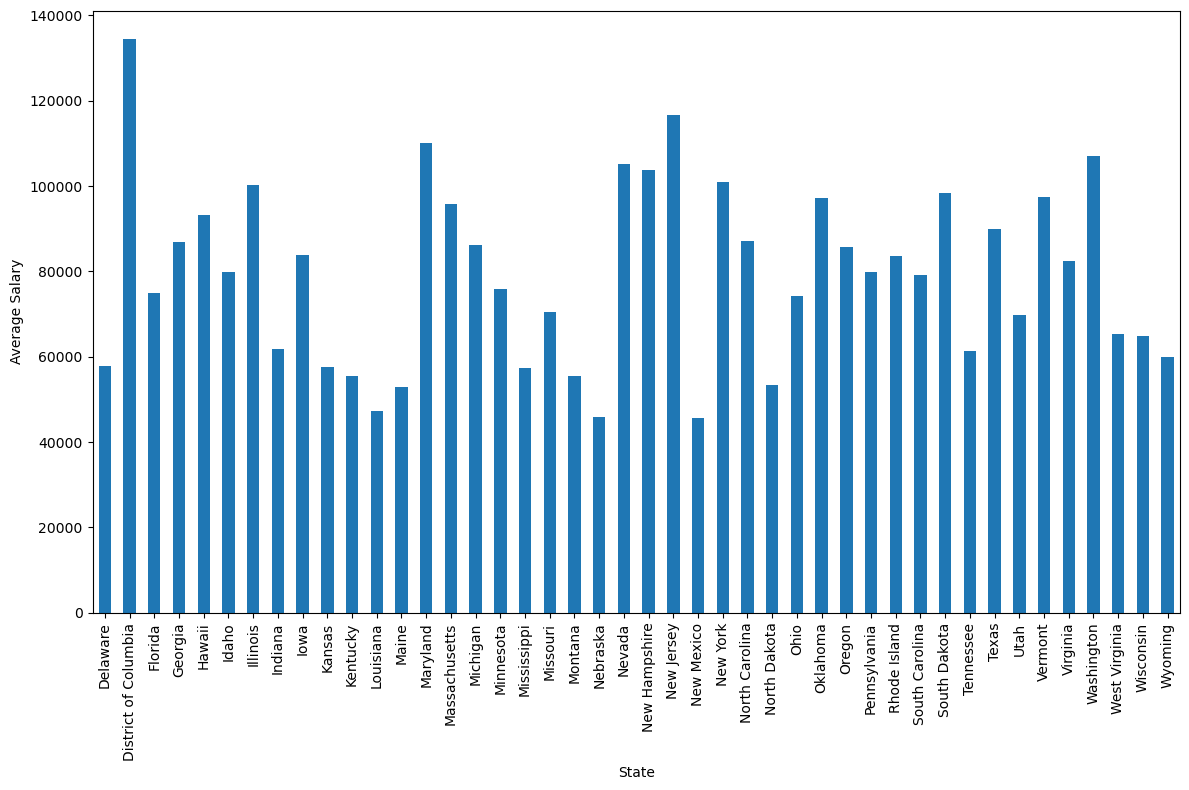

In [313]:
state_groups = analyze_home_only_df.groupby("State")
salary_by_state = state_groups["Estimated Average Salary"].mean()
salary_sum_by_state = state_groups["Estimated Average Salary"].sum()
per_capita_salary_by_state = salary_sum_by_state / state_pop

state_chart = salary_by_state.plot(kind="bar", figsize=(12,8))

state_chart.set_xlabel("State")
state_chart.set_ylabel("Average Salary")

plt.tight_layout()
plt.show()

In [269]:
worker_class1_group = analyze_home_only_df.groupby("Worker Class 1")["Worker Class 1"].count()
worker_class2_group = analyze_home_only_df.groupby("Worker Class 2")["Worker Class 2"].count()
worker_class3_group = analyze_home_only_df.groupby("Worker Class 3")["Worker Class 3"].count()
worker_class4_group = analyze_home_only_df.groupby("Worker Class 4")["Worker Class 4"].count()
worker_class5_group = analyze_home_only_df.groupby("Worker Class 5")["Worker Class 5"].count()
worker_class6_group = analyze_home_only_df.groupby("Worker Class 6")["Worker Class 6"].count()
worker_class_groups = pd.concat([worker_class1_group, worker_class2_group, worker_class3_group, worker_class4_group, worker_class5_group, worker_class6_group], axis=1)
merged_worker_class = worker_class_groups[["Worker Class 1", "Worker Class 2", "Worker Class 3", "Worker Class 4", "Worker Class 5", "Worker Class 6"]].sum(axis=1)
merged_worker_class

Employee of a private, for-profit company         23651.0
Employee of a private, not-for-profit company      3142.0
Federal government employee                        1442.0
Local government employee                           724.0
Self-employed in own incorporated business         3157.0
Self-employed in own not incorporated business     6632.0
State government employee                          1718.0
dtype: float64

In [267]:
industry_type1_group = analyze_home_only_df.groupby("Industry Type 1")["Industry Type 1"].count()
industry_type2_group = analyze_home_only_df.groupby("Industry Type 2")["Industry Type 2"].count()
industry_type3_group = analyze_home_only_df.groupby("Industry Type 3")["Industry Type 3"].count()
industry_type4_group = analyze_home_only_df.groupby("Industry Type 4")["Industry Type 4"].count()
industry_type5_group = analyze_home_only_df.groupby("Industry Type 5")["Industry Type 5"].count()
industry_type6_group = analyze_home_only_df.groupby("Industry Type 6")["Industry Type 6"].count()
industry_type_groups = pd.concat([industry_type1_group, industry_type2_group, industry_type3_group, industry_type4_group, industry_type5_group, industry_type6_group], axis=1)
merged_industry_type = industry_type_groups[["Industry Type 1", "Industry Type 2", "Industry Type 3", "Industry Type 4", "Industry Type 5", "Industry Type 6"]].sum(axis=1)
merged_industry_type.info()
merged_industry_type = merged_industry_type.append(<stuff here>)

<class 'pandas.core.series.Series'>
Index: 219 entries, Accounting, tax preparation, bookkeeping, and payroll services to Fabric mills, except knitting mills
Series name: None
Non-Null Count  Dtype  
--------------  -----  
219 non-null    float64
dtypes: float64(1)
memory usage: 3.4+ KB


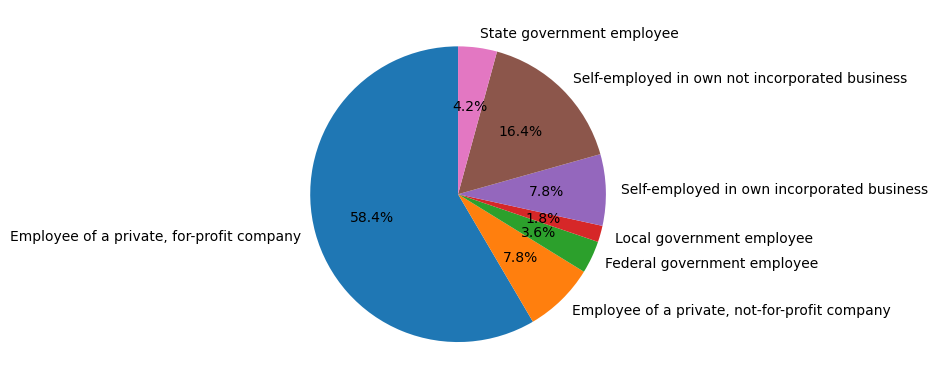

In [261]:
class_labels = merged_worker_class.index
class_sizes = merged_worker_class.values
#fig, ax = plt.subplots()
plt.pie(class_sizes, labels=class_labels, autopct="%1.1f%%", startangle=90)
plt.show()

In [507]:
occupation_type1_group = analyze_home_only_df.groupby("Occupation Type 1")["Occupation Type 1"].count()
occupation_type2_group = analyze_home_only_df.groupby("Occupation Type 2")["Occupation Type 2"].count()
occupation_type3_group = analyze_home_only_df.groupby("Occupation Type 3")["Occupation Type 3"].count()
occupation_type4_group = analyze_home_only_df.groupby("Occupation Type 4")["Occupation Type 4"].count()
occupation_type5_group = analyze_home_only_df.groupby("Occupation Type 5")["Occupation Type 5"].count()
occupation_type6_group = analyze_home_only_df.groupby("Occupation Type 6")["Occupation Type 6"].count()
occupation_type_groups = pd.concat([occupation_type1_group, occupation_type2_group, occupation_type3_group, occupation_type4_group, occupation_type5_group, occupation_type6_group], axis=1)
merged_occupation_type = occupation_type_groups[["Occupation Type 1", "Occupation Type 2", "Occupation Type 3", "Occupation Type 4", "Occupation Type 5", "Occupation Type 6"]].sum(axis=1)
merged_occ_df = pd.DataFrame(merged_occupation_type).reset_index()
merged_occ_df.columns = ["Occupation Type", "count"]
merged_occ_df["count"] = merged_occ_df["count"].astype(int)

#merged_occ_sum = pd.Series(merged_occ_df.sum(), dtype='int32')
merged_occ_sum = merged_occ_df["count"].astype(int).sum()
#merged_occ_sum = int(merged_occ_sum)
#merged_occ_sum = 40466
#merged_occ_sum.value = merged_occ_sum.value.astype(int)
merged_occ_df["Percentage"] = merged_occ_df["count"]/merged_occ_sum *100
#merged_occ_df
#merged_occ_df.iloc[:, merged_occ_df["Percentage"].loc["Percentage"] < 1]
misc_occ_df = merged_occ_df[merged_occ_df["Percentage"]<1]
upper_occ_df = pd.concat([merged_occ_df, misc_occ_df]).drop_duplicates(keep=False)
alt_occ_df = upper_occ_df.copy()
misc_new_row = misc_occ_df.sum()
misc_new_row.iloc[0] = "Misc."
upper_occ_df.loc[len(upper_occ_df)] = misc_new_row
upper_occ_df

,Occupation Type,count,Percentage
0,Accountants and auditors,837,2.068403
14,Artists and related workers,411,1.015667
22,"Bookkeeping, accounting, and auditing clerks",559,1.381407
32,Chief executives and legislators,961,2.374833
47,Computer and information systems managers,557,1.376464
50,"Computer occupations, all other",436,1.077448
52,Computer support specialists,558,1.378935
71,Customer service representatives,918,2.268571
106,"Farmers, ranchers, and other agricultural mana...",533,1.317155
111,Financial managers,518,1.280087


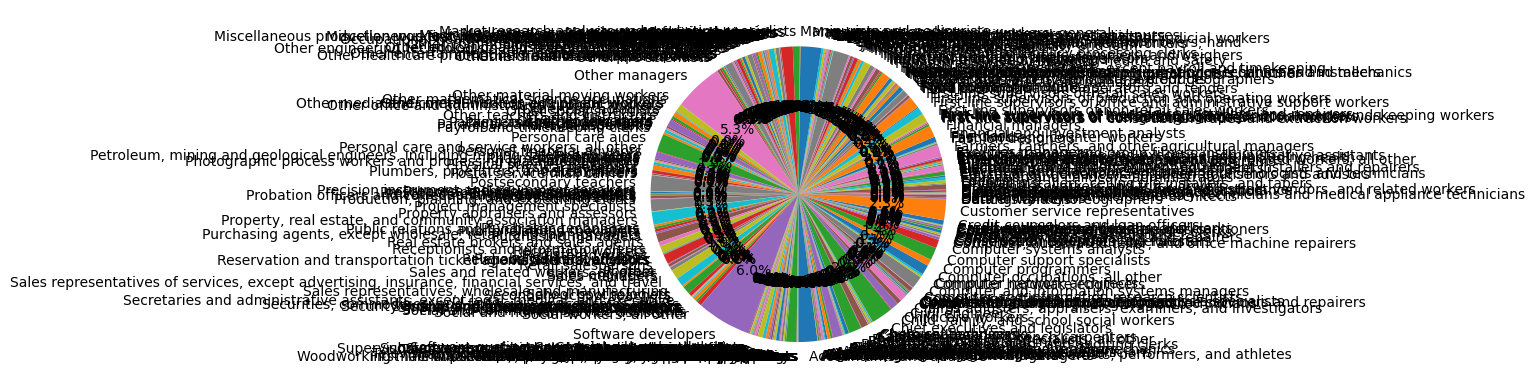

In [515]:
occupation_labels = merged_occupation_type.index
occupation_sizes = merged_occupation_type.values
plt.pie(occupation_sizes, labels=occupation_labels, autopct="%1.1f%%", startangle=270)
plt.show()

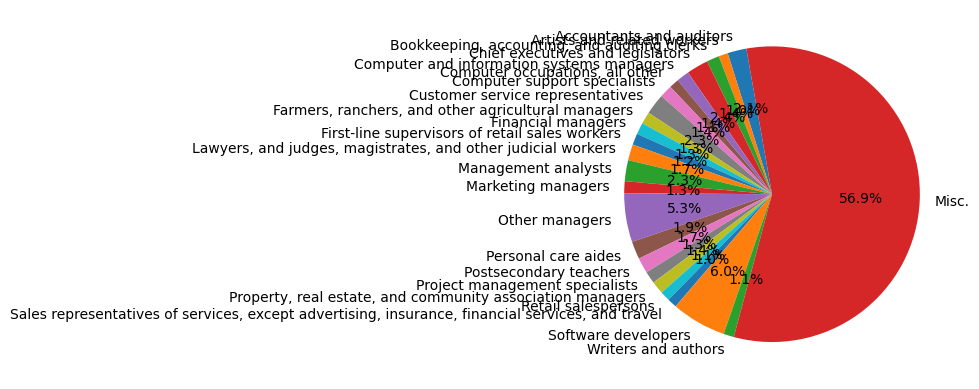

In [615]:
occupation_labels = upper_occ_df["Occupation Type"]
occupation_sizes = upper_occ_df["count"]
plt.pie(occupation_sizes, labels=occupation_labels, autopct="%1.1f%%", startangle=100)
plt.savefig("occupation_all_pie.png")
plt.show()

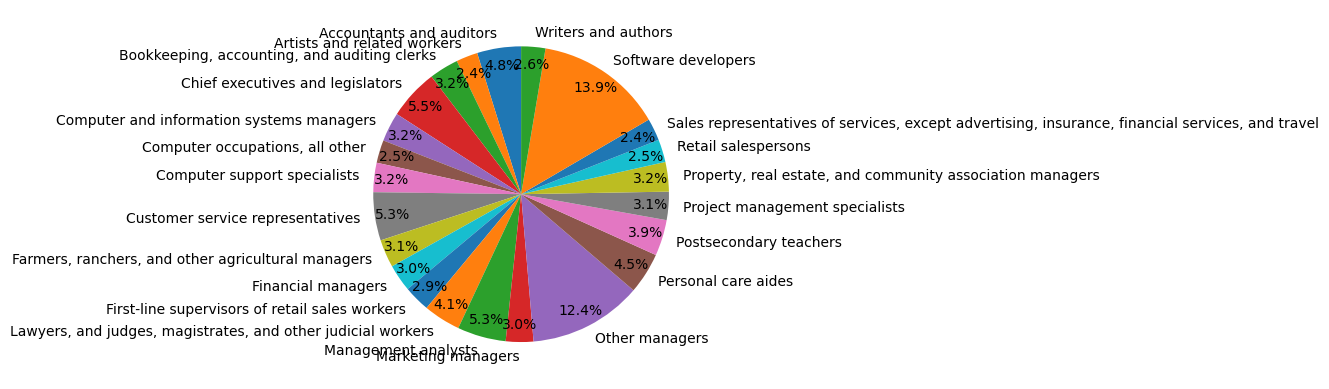

In [613]:
occupation_labels = alt_occ_df["Occupation Type"]
occupation_sizes = alt_occ_df["count"]
occupation_percent = alt_occ_df["Percentage"]
plt.pie(occupation_sizes, labels=occupation_labels, autopct="%1.1f%%", pctdistance=0.88, startangle=90)
plt.show()

In [537]:
industry_type1_group = analyze_home_only_df.groupby("Industry Type 1")["Industry Type 1"].count()
industry_type2_group = analyze_home_only_df.groupby("Industry Type 2")["Industry Type 2"].count()
industry_type3_group = analyze_home_only_df.groupby("Industry Type 3")["Industry Type 3"].count()
industry_type4_group = analyze_home_only_df.groupby("Industry Type 4")["Industry Type 4"].count()
industry_type5_group = analyze_home_only_df.groupby("Industry Type 5")["Industry Type 5"].count()
industry_type6_group = analyze_home_only_df.groupby("Industry Type 6")["Industry Type 6"].count()
industry_type_groups = pd.concat([industry_type1_group, industry_type2_group, industry_type3_group, industry_type4_group, industry_type5_group, industry_type6_group], axis=1)
merged_industry_type = industry_type_groups[["Industry Type 1", "Industry Type 2", "Industry Type 3", "Industry Type 4", "Industry Type 5", "Industry Type 6"]].sum(axis=1)
merged_ind_df = pd.DataFrame(merged_industry_type).reset_index()
merged_ind_df.columns = ["Industry Type", "count"]
merged_ind_df["count"] = merged_ind_df["count"].astype(int)

merged_ind_sum = merged_ind_df["count"].astype(int).sum()

merged_ind_df["Percentage"] = merged_ind_df["count"]/merged_ind_sum *100

misc2_ind_df = merged_ind_df[merged_ind_df["Percentage"]<1.5]
upper_ind_df = pd.concat([merged_ind_df, misc2_ind_df]).drop_duplicates(keep=False)
alt_ind_df = upper_ind_df.copy()
misc2_new_row = misc2_ind_df.sum()
misc2_new_row.iloc[0] = "Misc."
upper_ind_df.loc[len(upper_ind_df)] = misc2_new_row
upper_ind_df

,Industry Type,count,Percentage
0,"Accounting, tax preparation, bookkeeping, and ...",754,1.863293
3,Administration of human resource programs,898,2.219147
6,"Agencies, brokerages, and other insurance rela...",624,1.542035
15,"Architectural, engineering, and related services",777,1.920130
19,Banking and related activities,925,2.285870
35,"Colleges, universities, and professional schoo...",1494,3.691988
42,Computer systems design and related services,3862,9.543815
43,Construction (the cleaning of buildings and dw...,1038,2.565116
73,"General medical and surgical hospitals, and sp...",1002,2.476153
85,Individual and family services,687,1.697722


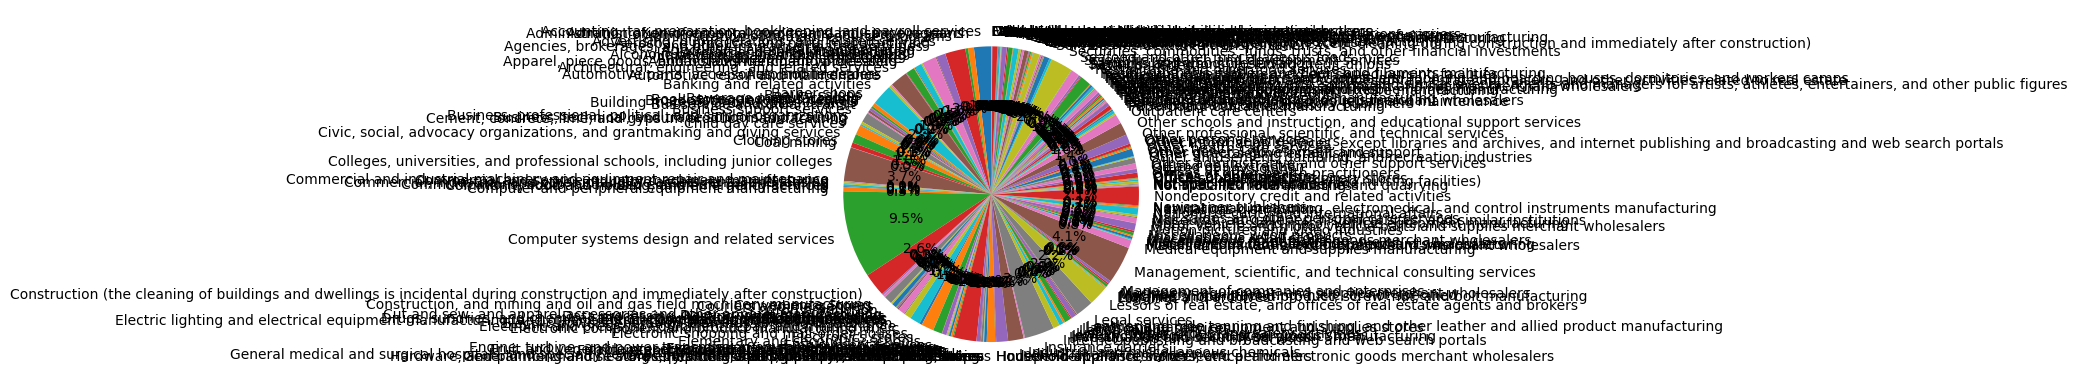

In [519]:
industry_labels = merged_industry_type.index
industry_sizes = merged_industry_type.values
plt.pie(industry_sizes, labels=industry_labels, autopct="%1.1f%%", startangle=90)
plt.show()

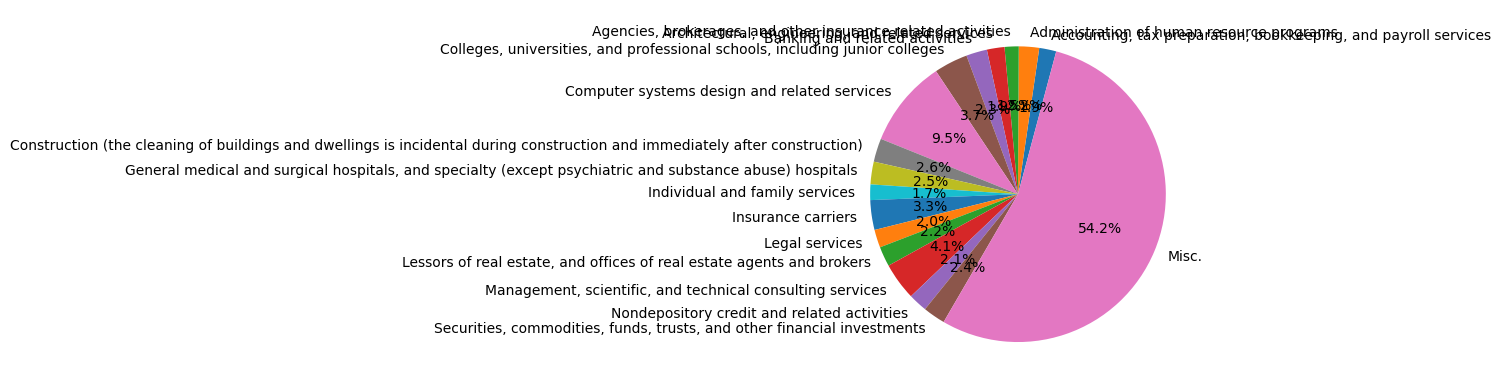

In [539]:
industry_labels = upper_ind_df["Industry Type"]
industry_sizes = upper_ind_df["count"]
plt.pie(industry_sizes, labels=industry_labels, autopct="%1.1f%%", startangle=75)
plt.show()

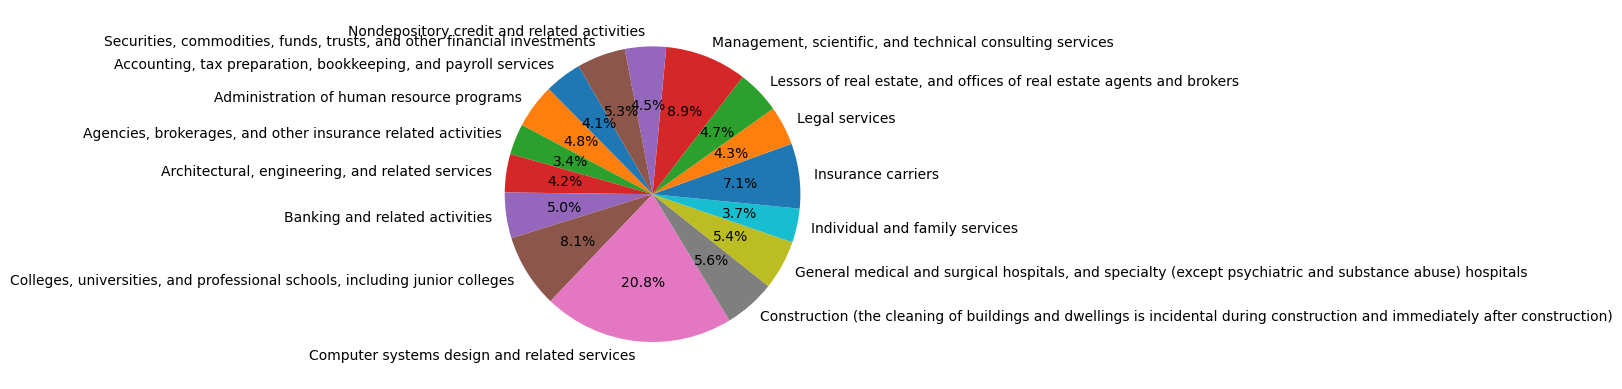

In [545]:
industry_labels = alt_ind_df["Industry Type"]
industry_sizes = alt_ind_df["count"]
plt.pie(industry_sizes, labels=industry_labels, autopct="%1.1f%%", startangle=120)
plt.show()

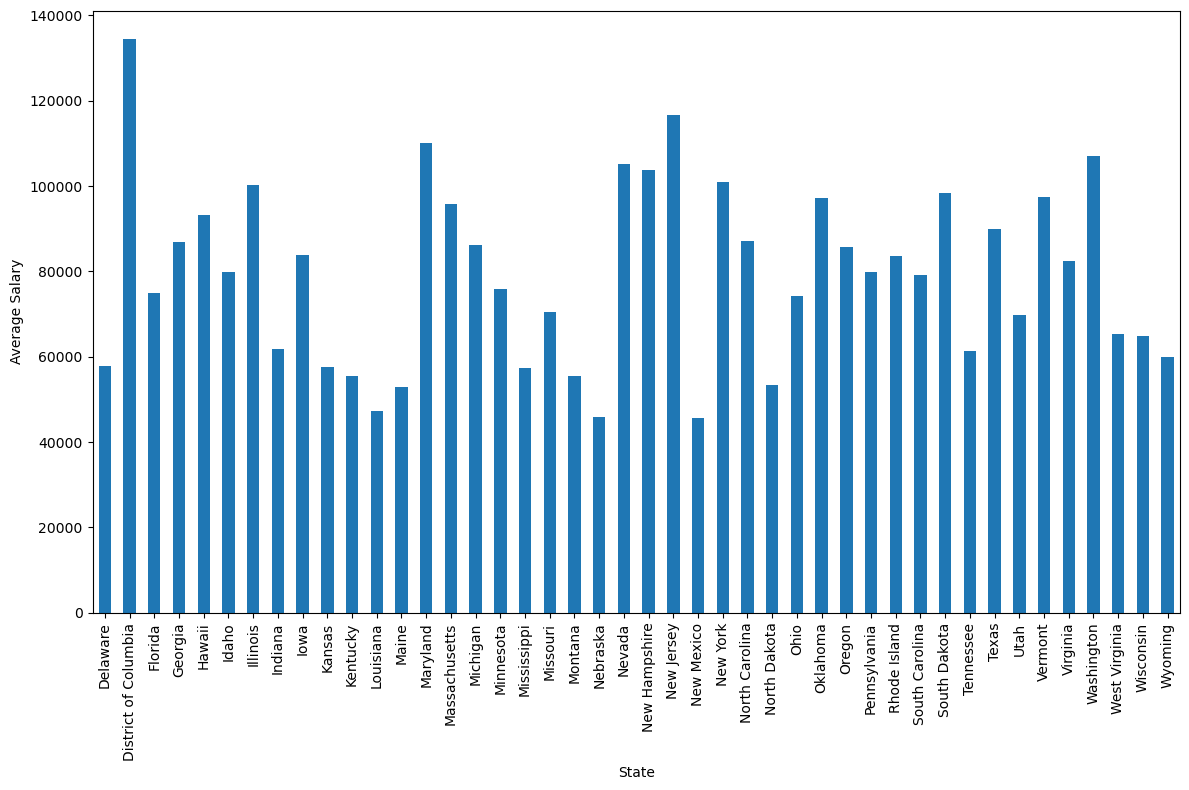

In [313]:
worker_class_groups = analyze_home_only_df.groupby(["Worker Class 1", "Worker Class 2", "Worker Class 3", "Worker Class 4", "Worker Class 5", "Worker Class 6"])
occupation_type_group = analyze_home_only_df.groupby("State")
industry_type_group = 
worker_class_by_state = state_groups["Estimated Average Salary"].mean()
salary_sum_by_state = state_groups["Estimated Average Salary"].sum()
per_capita_salary_by_state = salary_sum_by_state / state_pop

state_chart = salary_by_state.plot(kind="bar", figsize=(12,8))

state_chart.set_xlabel("State")
state_chart.set_ylabel("Average Salary")

plt.tight_layout()
plt.show()

In [93]:
test_df = home_only_df[home_only_df.index == 6424]
test_df

,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Occupation Type 3,Occupation Type 4,Occupation Type 5,Occupation Type 6,Work Hours 1,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6
6424,Montana,NaN,NaN,False,True,NaN,NaN,<NA>,<NA>,0,...,Retail salespersons,Retail salespersons,NaN,NaN,NaN,NaN,4.8,6.0,NaN,NaN


In [61]:
home_only_df.index.dtype

dtype('int64')

In [95]:
clear_non_remote_jobs(test_df.iloc[0])

Checking job 1
Checking job 2
Checking job 3
Job 3 was not work from home
Setting work hours 3
Checking job 4
Checking job 5
Checking job 6


State               Montana
Work From Home 1        NaN
Work From Home 2        NaN
Work From Home 3      False
Work From Home 4       True
                     ...   
Work Hours 6            NaN
Weekly 3.3             <NA>
Biweekly 3.3           <NA>
Monthly 3.3            <NA>
Bimonthly 3.3          <NA>
Name: 6424, Length: 116, dtype: object

In [117]:
adjusted_home_only_df = home_only_df.apply(clear_non_remote_jobs, axis=1)
adjusted_home_only_df = adjusted_home_only_df[home_only_df.columns]
#adjusted_home_only_df.head()
adjusted_home_only_df.columns

Index(['State', 'Work From Home 1', 'Work From Home 2', 'Work From Home 3',
       'Work From Home 4', 'Work From Home 5', 'Work From Home 6',
       'Home Days 1', 'Home Days 2', 'Home Days 3',
       ...
       'Occupation Type 3', 'Occupation Type 4', 'Occupation Type 5',
       'Occupation Type 6', 'Work Hours 1', 'Work Hours 2', 'Work Hours 3',
       'Work Hours 4', 'Work Hours 5', 'Work Hours 6'],
      dtype='object', length=112)

In [115]:
set(adjusted_home_only_df.columns)-set(home_only_df.columns)

{'Bimonthly 3.3',
 'Bimonthly 4.2',
 'Bimonthly 4.3',
 'Bimonthly 5.1',
 'Bimonthly 5.2',
 'Bimonthly 5.3',
 'Bimonthly 6.1',
 'Bimonthly 6.2',
 'Bimonthly 6.3',
 'Biweekly 3.3',
 'Biweekly 5.1',
 'Biweekly 5.2',
 'Biweekly 5.3',
 'Biweekly 6.1',
 'Biweekly 6.2',
 'Biweekly 6.3',
 'Hourly 4.3',
 'Hourly 5.3',
 'Hourly 6.1',
 'Hourly 6.2',
 'Hourly 6.3',
 'Income 4.3',
 'Income 5.2',
 'Income 5.3',
 'Income 6.2',
 'Income 6.3',
 'Monthly 2.3',
 'Monthly 3.3',
 'Monthly 4.1',
 'Monthly 4.2',
 'Monthly 4.3',
 'Monthly 5.1',
 'Monthly 5.2',
 'Monthly 5.3',
 'Monthly 6.1',
 'Monthly 6.2',
 'Monthly 6.3',
 'Weekly 3.3',
 'Weekly 4.2',
 'Weekly 4.3',
 'Weekly 5.1',
 'Weekly 5.3',
 'Weekly 6.1',
 'Weekly 6.2',
 'Weekly 6.3'}

In [25]:
# Clearing out non-remote jobs from the those with multiple jobs
def clear_non_remote_jobs(row):
    if row[f"Work From Home 1"] != "True":
        row[f"Home Days 1"] = pd.NA
        row[f"Income 1.1"] = pd.NA
        row[f"Income 1.2"] = pd.NA
        row[f"Income 1.3"] = pd.NA
        row[f"Hourly 1.1"] = pd.NA
        row[f"Hourly 1.2"] = pd.NA
        row[f"Hourly 1.3"] = pd.NA
        row[f"Weekly 1.1"] = pd.NA
        row[f"Weekly 1.2"] = pd.NA
        row[f"Weekly 1.3"] = pd.NA
        row[f"Biweekly 1.1"] = pd.NA
        row[f"Biweekly 1.2"] = pd.NA
        row[f"Biweekly 1.3"] = pd.NA
        row[f"Monthly 1.1"] = pd.NA
        row[f"Monthly 1.2"] = pd.NA
        row[f"Monthly 1.3"] = pd.NA
        row[f"Bimonthly 1.1"] = pd.NA
        row[f"Bimonthly 1.2"] = pd.NA
        row[f"Bimonthly 1.3"] = pd.NA
        row[f"Worker Class 1"] = pd.NA
        row[f"Industry Type 1"] = pd.NA
        row[f"Occupation Type 1"] = pd.NA
        row[f"Work Hours 1"] = pd.NA
    if row[f"Work From Home 2"] != "True":
        row[f"Home Days 2"] = pd.NA
        row[f"Income 2.1"] = pd.NA
        row[f"Income 2.2"] = pd.NA
        row[f"Income 2.3"] = pd.NA
        row[f"Hourly 2.1"] = pd.NA
        row[f"Hourly 2.2"] = pd.NA
        row[f"Hourly 2.3"] = pd.NA
        row[f"Weekly 2.1"] = pd.NA
        row[f"Weekly 2.2"] = pd.NA
        row[f"Weekly 2.3"] = pd.NA
        row[f"Biweekly 2.1"] = pd.NA
        row[f"Biweekly 2.2"] = pd.NA
        row[f"Biweekly 2.3"] = pd.NA
        row[f"Monthly 2.1"] = pd.NA
        row[f"Monthly 2.2"] = pd.NA
        row[f"Bimonthly 2.1"] = pd.NA
        row[f"Bimonthly 2.2"] = pd.NA
        row[f"Bimonthly 2.3"] = pd.NA
        row[f"Worker Class 2"] = pd.NA
        row[f"Industry Type 2"] = pd.NA
        row[f"Occupation Type 2"] = pd.NA
        row[f"Work Hours 2"] = pd.NA
    if row[f"Work From Home 3"] != "True":
        row[f"Home Days 3"] = pd.NA
        row[f"Income 3.1"] = pd.NA
        row[f"Income 3.2"] = pd.NA
        row[f"Income 3.3"] = pd.NA
        row[f"Hourly 3.1"] = pd.NA
        row[f"Hourly 3.2"] = pd.NA
        row[f"Hourly 3.3"] = pd.NA
        row[f"Weekly 3.1"] = pd.NA
        row[f"Weekly 3.2"] = pd.NA
        row[f"Biweekly 3.1"] = pd.NA
        row[f"Biweekly 3.2"] = pd.NA
        row[f"Monthly 3.1"] = pd.NA
        row[f"Monthly 3.2"] = pd.NA
        row[f"Bimonthly 3.1"] = pd.NA
        row[f"Bimonthly 3.2"] = pd.NA
        row[f"Worker Class 3"] = pd.NA
        row[f"Industry Type 3"] = pd.NA
        row[f"Occupation Type 3"] = pd.NA
        row[f"Work Hours 3"] = pd.NA
    if row[f"Work From Home 4"] != "True":
        row[f"Home Days 4"] = pd.NA
        row[f"Income 4.1"] = pd.NA
        row[f"Income 4.2"] = pd.NA
        row[f"Hourly 4.1"] = pd.NA
        row[f"Hourly 4.2"] = pd.NA
        row[f"Weekly 4.1"] = pd.NA
        row[f"Biweekly 4.1"] = pd.NA
        row[f"Biweekly 4.2"] = pd.NA
        row[f"Biweekly 4.3"] = pd.NA
        row[f"Bimonthly 4.1"] = pd.NA
        row[f"Worker Class 4"] = pd.NA
        row[f"Industry Type 4"] = pd.NA
        row[f"Occupation Type 4"] = pd.NA
        row[f"Work Hours 4"] = pd.NA
    if row[f"Work From Home 5"] != "True":
        row[f"Home Days 5"] = pd.NA
        row[f"Income 5.1"] = pd.NA
        row[f"Hourly 5.1"] = pd.NA
        row[f"Hourly 5.2"] = pd.NA
        row[f"Weekly 5.2"] = pd.NA
        row[f"Worker Class 5"] = pd.NA
        row[f"Industry Type 5"] = pd.NA
        row[f"Occupation Type 5"] = pd.NA
        row[f"Work Hours 5"] = pd.NA
    if row[f"Work From Home 6"] != "True":
        row[f"Home Days 6"] = pd.NA
        row[f"Income 6.1"] = pd.NA
        row[f"Worker Class 6"] = pd.NA
        row[f"Industry Type 6"] = pd.NA
        row[f"Occupation Type 6"] = pd.NA
        row[f"Work Hours 6"] = pd.NA

In [41]:
def clear_non_remote_jobs1(row):
    if row[f"Work From Home 1"] != "True":
        row[f"Home Days 1"] = pd.NA
        row[f"Income 1.1"] = pd.NA
        row[f"Income 1.2"] = pd.NA
        row[f"Income 1.3"] = pd.NA
        row[f"Hourly 1.1"] = pd.NA
        row[f"Hourly 1.2"] = pd.NA
        row[f"Hourly 1.3"] = pd.NA
        row[f"Weekly 1.1"] = pd.NA
        row[f"Weekly 1.2"] = pd.NA
        row[f"Weekly 1.3"] = pd.NA
        row[f"Biweekly 1.1"] = pd.NA
        row[f"Biweekly 1.2"] = pd.NA
        row[f"Biweekly 1.3"] = pd.NA
        row[f"Monthly 1.1"] = pd.NA
        row[f"Monthly 1.2"] = pd.NA
        row[f"Monthly 1.3"] = pd.NA
        row[f"Bimonthly 1.1"] = pd.NA
        row[f"Bimonthly 1.2"] = pd.NA
        row[f"Bimonthly 1.3"] = pd.NA
        row[f"Worker Class 1"] = pd.NA
        row[f"Industry Type 1"] = pd.NA
        row[f"Occupation Type 1"] = pd.NA
        row[f"Work Hours 1"] = pd.NA

adjusted_home_only_df = home_only_df.apply(clear_non_remote_jobs1, axis=1)
adjusted_home_only_df.head()

24    None
25    None
26    None
27    None
28    None
dtype: object

In [13]:
def clear_non_remote_jobs2(row):
    if row["Work From Home 2"] != "True":
        row["Home Days 2"] = pd.NA
        row["Income 2.1"] = pd.NA
        row["Income 2.2"] = pd.NA
        row["Income 2.3"] = pd.NA
        row["Hourly 2.1"] = pd.NA
        row["Hourly 2.2"] = pd.NA
        row["Hourly 2.3"] = pd.NA
        row["Weekly 2.1"] = pd.NA
        row["Weekly 2.2"] = pd.NA
        row["Weekly 2.3"] = pd.NA
        row["Biweekly 2.1"] = pd.NA
        row["Biweekly 2.2"] = pd.NA
        row["Biweekly 2.3"] = pd.NA
        row["Monthly 2.1"] = pd.NA
        row["Monthly 2.2"] = pd.NA
        row["Bimonthly 2.1"] = pd.NA
        row["Bimonthly 2.2"] = pd.NA
        row["Bimonthly 2.3"] = pd.NA
        row["Worker Class 2"] = pd.NA
        row["Industry Type 2"] = pd.NA
        row["Occupation Type 2"] = pd.NA
        row["Work Hours 2"] = pd.NA

In [15]:
adjusted_home_only_df = home_only_df.apply(clear_non_remote_jobs2, axis=1)

In [ ]:
def clear_non_remote_jobs3(row):
    if row["Work From Home 3"] != "True":
        row["Home Days 3"] = pd.NA
        row["Income 3.1"] = pd.NA
        row["Income 3.2"] = pd.NA
        row["Income 3.3"] = pd.NA
        row["Hourly 3.1"] = pd.NA
        row["Hourly 3.2"] = pd.NA
        row["Hourly 3.3"] = pd.NA
        row["Weekly 3.1"] = pd.NA
        row["Weekly 3.2"] = pd.NA
        row["Biweekly 3.1"] = pd.NA
        row["Biweekly 3.2"] = pd.NA
        row["Monthly 3.1"] = pd.NA
        row["Monthly 3.2"] = pd.NA
        row["Bimonthly 3.1"] = pd.NA
        row["Bimonthly 3.2"] = pd.NA
        row["Worker Class 3"] = pd.NA
        row["Industry Type 3"] = pd.NA
        row["Occupation Type 3"] = pd.NA
        row["Work Hours 3"] = pd.NA

In [21]:
# DON'T USE THIS ONE
# Clearing out non-remote jobs from the those with multiple jobs
def clear_non_remote_jobs(row):
    for i in ["1", "2", "3", "4", "5", "6"]:
        try:
            if row[f"Work From Home {i}"] != "True":
                row[f"Home Days {i}"] = pd.NA
                row[f"Income {i}.1"] = pd.NA
                row[f"Income {i}.2"] = pd.NA
                row[f"Income {i}.3"] = pd.NA
                row[f"Hourly {i}.1"] = pd.NA
                row[f"Hourly {i}.2"] = pd.NA
                row[f"Hourly {i}.3"] = pd.NA
                row[f"Weekly {i}.1"] = pd.NA
                row[f"Weekly {i}.2"] = pd.NA
                row[f"Weekly {i}.3"] = pd.NA
                row[f"Biweekly {i}.1"] = pd.NA
                row[f"Biweekly {i}.2"] = pd.NA
                row[f"Biweekly {i}.3"] = pd.NA
                row[f"Monthly {i}.1"] = pd.NA
                row[f"Monthly {i}.2"] = pd.NA
                row[f"Monthly {i}.3"] = pd.NA
                row[f"Bimonthly {i}.1"] = pd.NA
                row[f"Bimonthly {i}.2"] = pd.NA
                row[f"Bimonthly {i}.3"] = pd.NA
                row[f"Worker Class {i}"] = pd.NA
                row[f"Industry Type {i}"] = pd.NA
                row[f"Occupation Type {i}"] = pd.NA
                row[f"Work Hours {i}"] = pd.NA
        except:
            print(f"Item for row {i} not found. Skipping.")

In [ ]:
# Run the function
adjusted_home_only_df = home_only_df.apply(clear_non_remote_jobs, axis=1)

,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Occupation Type 3,Occupation Type 4,Occupation Type 5,Occupation Type 6,Work Hours 1,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6
24,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
25,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
26,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
27,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN
28,Kansas,True,NaN,NaN,NaN,NaN,NaN,5,<NA>,<NA>,...,NaN,NaN,NaN,NaN,40.0,NaN,NaN,NaN,NaN,NaN


In [131]:
adjusted_home_only_df.dropna(axis=1, how="all", inplace=True)
#Check which columns have been removed
set(home_only_df.columns)-set(adjusted_home_only_df.columns)
#adjusted_home_only_df.head()

{'Bimonthly 2.2',
 'Bimonthly 2.3',
 'Bimonthly 3.1',
 'Bimonthly 3.2',
 'Bimonthly 4.1',
 'Biweekly 2.3',
 'Biweekly 3.2',
 'Biweekly 4.2',
 'Biweekly 4.3',
 'Hourly 3.3',
 'Hourly 4.2',
 'Hourly 5.1',
 'Hourly 5.2',
 'Income 3.3',
 'Income 4.2',
 'Income 6.1',
 'Monthly 3.2',
 'Weekly 2.2',
 'Weekly 2.3',
 'Weekly 3.2',
 'Weekly 5.2'}

In [123]:
adjusted_home_only_df.to_csv("Resources/home_only_test.csv")

In [319]:
not_home_df = full_df.copy()

In [327]:
not_home_df = not_home_df[(not_home_df[['Work From Home 1', 'Work From Home 2', 'Work From Home 3', 'Work From Home 4', 'Work From Home 5', 'Work From Home 6']] == ['No', 'No', 'No', 'No', 'No', 'No']).any(axis=1)]
print(f"Number of returned rows: {len(not_home_df)}")
not_home_df.head()

Number of returned rows: 185025


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Occupation Code 3,Occupation Code 4,Occupation Code 5,Occupation Code 6,Work Hours 1,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6
0,Kansas,No,NaN,NaN,NaN,NaN,NaN,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,35.00,<NA>,<NA>,<NA>,<NA>,<NA>
1,Kansas,No,NaN,NaN,NaN,NaN,NaN,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,35.00,<NA>,<NA>,<NA>,<NA>,<NA>
2,Kansas,No,NaN,NaN,NaN,NaN,NaN,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,35.00,<NA>,<NA>,<NA>,<NA>,<NA>
3,Kansas,No,NaN,NaN,NaN,NaN,NaN,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,35.00,<NA>,<NA>,<NA>,<NA>,<NA>
4,Kansas,No,NaN,NaN,NaN,NaN,NaN,0,<NA>,<NA>,...,NaN,NaN,NaN,NaN,35.00,<NA>,<NA>,<NA>,<NA>,<NA>


In [155]:
print(len(home_only_df))
print(len(not_home_df))
len(home_only_df[home_only_df['Work From Home 2'] == '1'])

38179
185025


4892

In [163]:
len(full_df[full_df['Work From Home 1'] == '-9'])

275947

In [177]:
home_only_df["Hourly 1.1"].tail()

487519    -999.00
487533    -999.00
487534    -999.00
487535    -999.00
487543    -999.00
Name: Hourly 1.1, dtype: object

In [191]:
print(len(home_only_df))
print(len(home_only_df[home_only_df["Hourly 1.1"] != "-999.00"]))
print(len(home_only_df[home_only_df["Biweekly 1.1"] != "-999"]))

38179
5316
287


In [189]:
biweekly_home_only_df = home_only_df[home_only_df["Biweekly 1.1"] != "-999"]
print(len(biweekly_home_only_df))
biweekly_home_only_df.head()

3129


,State,Work From Home 1,Work From Home 2,Work From Home 3,Work From Home 4,Work From Home 5,Work From Home 6,Home Days 1,Home Days 2,Home Days 3,...,Occupation Code 3,Occupation Code 4,Occupation Code 5,Occupation Code 6,Work Hours 1,Work Hours 2,Work Hours 3,Work Hours 4,Work Hours 5,Work Hours 6
1848,40,1,-9,-9,-9,-9,-9,5,-999,-999,...,,,,-9,40.00,-999.00,-999.00,-999.00,-999.00,-999.00
1849,40,1,-9,-9,-9,-9,-9,5,-999,-999,...,,,,-9,40.00,-999.00,-999.00,-999.00,-999.00,-999.00
1850,40,1,-9,-9,-9,-9,-9,5,-999,-999,...,,,,-9,40.00,-999.00,-999.00,-999.00,-999.00,-999.00
1851,40,1,-9,-9,-9,-9,-9,5,-999,-999,...,,,,-9,40.00,-999.00,-999.00,-999.00,-999.00,-999.00
1852,40,1,-9,-9,-9,-9,-9,5,-999,-999,...,,,,-9,40.00,-999.00,-999.00,-999.00,-999.00,-999.00


In [ ]:
edit_med_df = med_df[med_df["Home Days 1"]

In [43]:
from collections import Counter

year_list = call("SPANEL")

counts = Counter(year_list)

print(counts)

Counter({'2022': 10195, '2020': 3921, '2021': 3332})


In [59]:
class2_list = call("TJB1_HOURLY1")

class2_counts = Counter(class2_list)

print(class2_counts)
print(len(class2_list))

Counter({'-999.00': 424141, '15.00': 3698, '16.00': 2073, '14.00': 1938, '17.00': 1901, '20.00': 1895, '13.00': 1720, '18.00': 1712, '12.00': 1692, '10.00': 1590, '25.00': 1228, '11.00': 1121, '19.00': 1106, '101.00': 1104, '16.50': 810, '22.00': 748, '21.00': 701, '23.00': 694, '12.50': 657, '15.50': 625, '35.00': 601, '30.00': 588, '9.00': 535, '14.50': 531, '17.50': 523, '8.00': 511, '28.00': 510, '24.00': 485, '13.50': 453, '127.00': 432, '18.50': 431, '27.00': 421, '40.00': 392, '26.00': 381, '32.00': 376, '10.50': 375, '19.50': 357, '12.30': 355, '11.50': 348, '9.50': 322, '17.30': 302, '140.00': 279, '16.80': 278, '31.00': 268, '16.30': 252, '22.50': 249, '33.00': 247, '14.30': 246, '21.50': 244, '29.00': 232, '45.00': 230, '13.30': 215, '15.80': 214, '15.30': 207, '12.80': 199, '37.00': 198, '50.00': 193, '34.00': 193, '18.30': 189, '17.80': 186, '19.80': 182, '16.20': 180, '18.80': 178, '8.50': 176, '14.80': 175, '15.70': 175, '7.25': 173, '10.80': 169, '23.50': 169, '36.00': 

In [53]:
class2_list = call("EJB4_CLWRK")

class2_counts = Counter(class2_list)

print(class2_counts)
len(class2_list)

Counter({'-9': 487289, '5': 204, '6': 62, '8': 57, '4': 50, '7': 30, '3': 27, '1': 17})


487736

In [11]:
# Renaming indices
data = {"State": state_list,
        #"Gender": bio_list,
        "Worker Class": class1_list,
        "Days Worked from Home": from_home1_list,
        "Income": income1_list
        
}

# Creating copy of DataFrame to adjust
df = pd.DataFrame(data)
df.head()

,State,Worker Class,Days Worked from Home,Income
0,20,5,0,-999
1,20,5,0,-999
2,20,5,0,-999
3,20,5,0,-999
4,20,5,0,-999


In [17]:
# Renaming indices
data = {"State": state_list,
        #"Gender": bio_list,
        "Worker Class": class_list,
        "Days Worked from Home": from_home_list,
        "Income": income_list
}

# Creating copy of DataFrame to adjust
df = pd.DataFrame(data)
basic_df = df.copy()

# Defining states
state_fips_to_name = {
    '01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas', '06': 'California',
    '08': 'Colorado', '09': 'Connecticut', '10': 'Delaware', '11': 'District of Columbia',
    '12': 'Florida', '13': 'Georgia', '15': 'Hawaii', '16': 'Idaho', '17': 'Illinois',
    '18': 'Indiana', '19': 'Iowa', '20': 'Kansas', '21': 'Kentucky', '22': 'Louisiana',
    '23': 'Maine', '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan', '27': 'Minnesota',
    '28': 'Mississippi', '29': 'Missouri', '30': 'Montana', '31': 'Nebraska', '32': 'Nevada',
    '33': 'New Hampshire', '34': 'New Jersey', '35': 'New Mexico', '36': 'New York', '37': 'North Carolina',
    '38': 'North Dakota', '39': 'Ohio', '40': 'Oklahoma', '41': 'Oregon', '42': 'Pennsylvania',
    '44': 'Rhode Island', '45': 'South Carolina', '46': 'South Dakota', '47': 'Tennessee', '48': 'Texas',
    '49': 'Utah', '50': 'Vermont', '51': 'Virginia', '53': 'Washington', '54': 'West Virginia',
    '55': 'Wisconsin', '56': 'Wyoming', '72': 'Puerto Rico'
}
# Mapping states to values
basic_df["State"] = df["State"].map(state_fips_to_name)
# Defining worker class
class_value_to_words = {
      "2": "Active duty military",
      "6": "Employee of a private, not-for-profit company",
      "8": "Self-employed in own not incorporated business",
      "1": "Federal government employee",
      "-9": "NA or Missing",
      "3": "State government employee",
      "5": "Employee of a private, for-profit company",
      "7": "Self-employed in own incorporated business",
      "4": "Local government employee"
}
# Mapping worker class
basic_df["Worker Class"] = df["Worker Class"].map(class_value_to_words)
# Defining gender
#gender_to_words = {
#      "1": "Male",
#      "2": "Female",
#}
# Mapping gender
#basic_df["Gender"] = df["Gender"].map(gender_to_words)
# Printing basic info
print(len(basic_df))
basic_df.head()

#Exporting to CSV file
basic_df.to_csv("basic_home_worker.csv")

487736


In [17]:
# Defining states
state_fips_to_name = {
    '01': 'Alabama', '02': 'Alaska', '04': 'Arizona', '05': 'Arkansas', '06': 'California',
    '08': 'Colorado', '09': 'Connecticut', '10': 'Delaware', '11': 'District of Columbia',
    '12': 'Florida', '13': 'Georgia', '15': 'Hawaii', '16': 'Idaho', '17': 'Illinois',
    '18': 'Indiana', '19': 'Iowa', '20': 'Kansas', '21': 'Kentucky', '22': 'Louisiana',
    '23': 'Maine', '24': 'Maryland', '25': 'Massachusetts', '26': 'Michigan', '27': 'Minnesota',
    '28': 'Mississippi', '29': 'Missouri', '30': 'Montana', '31': 'Nebraska', '32': 'Nevada',
    '33': 'New Hampshire', '34': 'New Jersey', '35': 'New Mexico', '36': 'New York', '37': 'North Carolina',
    '38': 'North Dakota', '39': 'Ohio', '40': 'Oklahoma', '41': 'Oregon', '42': 'Pennsylvania',
    '44': 'Rhode Island', '45': 'South Carolina', '46': 'South Dakota', '47': 'Tennessee', '48': 'Texas',
    '49': 'Utah', '50': 'Vermont', '51': 'Virginia', '53': 'Washington', '54': 'West Virginia',
    '55': 'Wisconsin', '56': 'Wyoming', '72': 'Puerto Rico'
}
# Mapping states to values
full_df["State"] = full_df["State"].map(state_fips_to_name)
# Defining worker class
class_value_to_words = {
      "2": "Active duty military",
      "6": "Employee of a private, not-for-profit company",
      "8": "Self-employed in own not incorporated business",
      "1": "Federal government employee",
      "-9": "NA or Missing",
      "3": "State government employee",
      "5": "Employee of a private, for-profit company",
      "7": "Self-employed in own incorporated business",
      "4": "Local government employee"
}
# Mapping worker class
full_df["Worker Class"] = full_df["Worker Class"].map(class_value_to_words)
# Defining gender
class_value_to_words = {
      "2": "Active duty military",
      "6": "Employee of a private, not-for-profit company",
      "8": "Self-employed in own not incorporated business",
      "1": "Federal government employee",
      "-9": "NA or Missing",
      "3": "State government employee",
      "5": "Employee of a private, for-profit company",
      "7": "Self-employed in own incorporated business",
      "4": "Local government employee"
}
# Mapping gender


487736


In [197]:
# Defining states
occupation_code_to_name = {
    '0010': 'Chief executives and legislators', '0020': 'General and operations managers', '0040': 'Advertising and promotions managers', '0051': 'Marketing managers', '0052': 'Sales managers', '0060': 'Public relations and fundraising managers', '0101': 'Administrative services managers', '0102': 'Facilities managers', '0110': 'Computer and information systems managers', '0120': 'Financial managers', '0135': 'Compensation and benefits managers', '0136': 'Human resources managers', '0137': 'Training and development managers', '0140': 'Industrial production managers', '0150': 'Purchasing managers', '0160': 'Transportation, storage, and distribution managers', '0205': 'Farmers, ranchers, and other agricultural managers', '0220': 'Construction managers', '0230': 'Education and childcare administrators', '0300': 'Architectural and engineering managers', '0310': 'Food service managers', '0335': 'Entertainment and recreation managers', '0340': 'Lodging managers', '0350': 'Medical and health services managers', '0360': 'Natural sciences managers', '0410': 'Property, real estate, and community association managers', '0420': 'Social and community service managers', '0425': 'Emergency management directors', '0440': 'Other managers', '0500': 'Agents and business managers of artists, performers, and athletes', '0510': 'Buyers and purchasing agents, farm products', '0520': 'Wholesale and retail buyers, except farm products', '0530': 'Purchasing agents, except wholesale, retail, and farm products', '0540': 'Claims adjusters, appraisers, examiners, and investigators', '0565': 'Compliance officers', '0600': 'Cost estimators', '0630': 'Human resources workers', '0640': 'Compensation, benefits, and job analysis specialists', '0650': 'Training and development specialists', '0700': 'Logisticians', '0705': 'Project management specialists', '0710': 'Management analysts', '0725': 'Meeting, convention, and event planners', '0726': 'Fundraisers', '0735': 'Market research analysts and marketing specialists', '0750': 'Business operations specialists, all other', '0800': 'Accountants and auditors', '0810': 'Property appraisers and assessors', '0820': 'Budget analysts', '0830': 'Credit analysts', '0845': 'Financial and investment analysts', '0850': 'Personal financial advisors', '0860': 'Insurance underwriters', '0900': 'Financial examiners', '0910': 'Credit counselors and loan officers', '0930': 'Tax examiners and collectors, and revenue agents', '0940': 'Tax preparers', '0960': 'Other financial specialists', '1005': 'Computer and information research scientists', '1006': 'Computer systems analysts', '1007': 'Information security analysts', '1010': 'Computer programmers', '1021': 'Software developers', '1022': 'Software quality assurance analysts and testers', '1031': 'Web developers', '1032': 'Web and digital interface designers', '1050': 'Computer support specialists', '1065': 'Database administrators and architects', '1105': 'Network and computer systems administrators', '1106': 'Computer network architects', '1108': 'Computer occupations, all other', '1200': 'Actuaries', '1220': 'Operations research analysts', '1240': 'Other mathematical science occupations', '1305': 'Architects, except landscape and naval', '1306': 'Landscape architects', '1310': 'Surveyors, cartographers, and photogrammetrists', '1320': 'Aerospace engineers', '1340': 'Biomedical and agricultural engineers', '1350': 'Chemical engineers', '1360': 'Civil engineers', '1400': 'Computer hardware engineers', '1410': 'Electrical and electronics engineers', '1420': 'Environmental engineers', '1430': 'Industrial engineers, including health and safety', '1440': 'Marine engineers and naval architects', '1450': 'Materials engineers', '1460': 'Mechanical engineers', '1520': 'Petroleum, mining and geological engineers, including mining safety engineers', '1530': 'Other engineers', '1541': 'Architectural and civil drafters', '1545': 'Other drafters', '1551': 'Electrical and electronic engineering technologists and technicians', '1555': 'Other engineering technologists and technicians, except drafters', '1560': 'Surveying and mapping technicians', '1600': 'Agricultural and food scientists', '1610': 'Biological scientists', '1640': 'Conservation scientists and foresters', '1650': 'Other life scientists', '1700': 'Astronomers and physicists', '1710': 'Atmospheric and space scientists', '1720': 'Chemists and materials scientists', '1745': 'Environmental scientists and specialists, including health', '1750': 'Geoscientists and hydrologists, except geographers', '1760': 'Physical scientists, all other', '1800': 'Economists', '1821': 'Clinical and counseling psychologists', '1822': 'School psychologists', '1825': 'Other psychologists', '1840': 'Urban and regional planners', '1860': 'Other social scientists', '1900': 'Agricultural and food science technicians', '1910': 'Biological technicians', '1920': 'Chemical technicians', '1935': 'Environmental science and geoscience technicians, and nuclear technicians', '1970': 'Other life, physical, and social science technicians', '1980': 'Occupational health and safety specialists and technicians', '2001': 'Substance abuse and behavioral disorder counselors', '2002': 'Educational, guidance, and career counselors and advisors', '2003': 'Marriage and family therapists', '2004': 'Mental health counselors', '2005': 'Rehabilitation counselors', '2006': 'Counselors, all other', '2011': 'Child, family, and school social workers', '2012': 'Healthcare social workers', '2013': 'Mental health and substance abuse social workers', '2014': 'Social workers, all other', '2015': 'Probation officers and correctional treatment specialists', '2016': 'Social and human service assistants', '2025': 'Other community and social service specialists', '2040': 'Clergy', '2050': 'Directors, religious activities and education', '2060': 'Religious workers, all other', '2100': 'Lawyers, and judges, magistrates, and other judicial workers', '2105': 'Judicial law clerks', '2145': 'Paralegals and legal assistants', '2170': 'Title examiners, abstractors, and searchers', '2180': 'Legal support workers, all other', '2205': 'Postsecondary teachers', '2300': 'Preschool and kindergarten teachers', '2310': 'Elementary and middle school teachers', '2320': 'Secondary school teachers', '2330': 'Special education teachers', '2350': 'Tutors', '2360': 'Other teachers and instructors', '2400': 'Archivists, curators, and museum technicians', '2435': 'Librarians and media collections specialists', '2440': 'Library technicians', '2545': 'Teaching assistants', '2555': 'Other educational instruction and library workers', '2600': 'Artists and related workers', '2631': 'Commercial and industrial designers', '2632': 'Fashion designers', '2633': 'Floral designers', '2634': 'Graphic designers', '2635': 'Interior designers', '2636': 'Merchandise displayers and window trimmers', '2640': 'Other designers', '2700': 'Actors', '2710': 'Producers and directors', '2721': 'Athletes and sports competitors', '2722': 'Coaches and scouts', '2723': 'Umpires, referees, and other sports officials', '2740': 'Dancers and choreographers', '2751': 'Music directors and composers', '2752': 'Musicians and singers', '2755': 'Disc jockeys, except radio', '2770': 'Entertainers and performers, sports and related workers, all other', '2805': 'Broadcast announcers and radio disc jockeys', '2810': 'News analysts, reporters, and journalists', '2825': 'Public relations specialists', '2830': 'Editors', '2840': 'Technical writers', '2850': 'Writers and authors', '2861': 'Interpreters and translators', '2862': 'Court reporters and simultaneous captioners', '2865': 'Media and communication workers, all other', '2905': 'Other media and communication equipment workers', '2910': 'Photographers', '2920': 'Television, video, and film camera operators and editors', '3000': 'Chiropractors', '3010': 'Dentists', '3030': 'Dietitians and nutritionists', '3040': 'Optometrists', '3050': 'Pharmacists', '3090': 'Physicians', '3100': 'Surgeons', '3110': 'Physician assistants', '3120': 'Podiatrists', '3140': 'Audiologists', '3150': 'Occupational therapists', '3160': 'Physical therapists', '3200': 'Radiation therapists', '3210': 'Recreational therapists', '3220': 'Respiratory therapists', '3230': 'Speech-language pathologists', '3245': 'Other therapists', '3250': 'Veterinarians', '3255': 'Registered nurses', '3256': 'Nurse anesthetists', '3258': 'Nurse practitioners, and nurse midwives', '3261': 'Acupuncturists', '3270': 'Healthcare diagnosing or treating practitioners, all other', '3300': 'Clinical laboratory technologists and technicians', '3310': 'Dental hygienists', '3321': 'Cardiovascular technologists and technicians', '3322': 'Diagnostic medical sonographers', '3323': 'Radiologic technologists and technicians', '3324': 'Magnetic resonance imaging technologists', '3330': 'Nuclear medicine technologists and medical dosimetrists', '3401': 'Emergency medical technicians', '3402': 'Paramedics', '3421': 'Pharmacy technicians', '3422': 'Psychiatric technicians', '3423': 'Surgical technologists', '3424': 'Veterinary technologists and technicians', '3430': 'Dietetic technicians and ophthalmic medical technicians', '3500': 'Licensed practical and licensed vocational nurses', '3515': 'Medical records specialists', '3520': 'Opticians, dispensing', '3545': 'Miscellaneous health technologists and technicians', '3550': 'Other healthcare practitioners and technical occupations', '3601': 'Home health aides', '3602': 'Personal care aides', '3603': 'Nursing assistants', '3605': 'Orderlies and psychiatric aides', '3610': 'Occupational therapy assistants and aides', '3620': 'Physical therapist assistants and aides', '3630': 'Massage therapists', '3640': 'Dental assistants', '3645': 'Medical assistants', '3646': 'Medical transcriptionists', '3647': 'Pharmacy aides', '3648': 'Veterinary assistants and laboratory animal caretakers', '3649': 'Phlebotomists', '3655': 'Other healthcare support workers', '3700': 'First-line supervisors of correctional officers', '3710': 'First-line supervisors of police and detectives', '3720': 'First-line supervisors of firefighting and prevention workers', '3725': 'Miscellaneous first-line supervisors, protective service workers', '3740': 'Firefighters', '3750': 'Fire inspectors', '3801': 'Bailiffs', '3802': 'Correctional officers and jailers', '3820': 'Detectives and criminal investigators', '3840': 'Fish and game wardens and parking enforcement officers', '3870': 'Police officers', '3900': 'Animal control workers', '3910': 'Private detectives and investigators', '3930': 'Security guards and gambling surveillance officers', '3930': 'Security guards and gaming surveillance officers', '3940': 'Crossing guards and flaggers', '3945': 'Transportation security screeners', '3946': 'School bus monitors', '3960': 'Other protective service workers', '4000': 'Chefs and head cooks', '4010': 'First-line supervisors of food preparation and serving workers', '4020': 'Cooks', '4030': 'Food preparation workers', '4040': 'Bartenders', '4055': 'Fast food and counter workers', '4110': 'Waiters and waitresses', '4120': 'Food servers, nonrestaurant', '4130': 'Dining room and cafeteria attendants and bartender helpers', '4140': 'Dishwashers', '4150': 'Hosts and hostesses, restaurant, lounge, and coffee shop', '4160': 'Food preparation and serving related workers, all other', '4200': 'First-line supervisors of housekeeping and janitorial workers', '4210': 'First-line supervisors of landscaping, lawn service, and groundskeeping workers', '4220': 'Janitors and building cleaners', '4230': 'Maids and housekeeping cleaners', '4240': 'Pest control workers', '4251': 'Landscaping and groundskeeping workers', '4252': 'Tree trimmers and pruners', '4255': 'Other grounds maintenance workers', '4330': 'Supervisors of personal care and service workers', '4340': 'Animal trainers', '4350': 'Animal caretakers', '4400': 'Gambling services workers', '4420': 'Ushers, lobby attendants, and ticket takers', '4435': 'Other entertainment attendants and related workers', '4461': 'Embalmers, crematory operators, and funeral attendants', '4461': 'Embalmers, crematory operators and funeral attendants', '4465': 'Morticians, undertakers, and funeral arrangers', '4500': 'Barbers', '4510': 'Hairdressers, hairstylists, and cosmetologists', '4521': 'Manicurists and pedicurists', '4522': 'Skincare specialists', '4525': 'Other personal appearance workers', '4530': 'Baggage porters, bellhops, and concierges', '4540': 'Tour and travel guides', '4600': 'Childcare workers', '4621': 'Exercise trainers and group fitness instructors', '4622': 'Recreation workers', '4640': 'Residential advisors', '4655': 'Personal care and service workers, all other', '4700': 'First-line supervisors of retail sales workers', '4710': 'First-line supervisors of non-retail sales workers', '4720': 'Cashiers', '4740': 'Counter and rental clerks', '4750': 'Parts salespersons', '4760': 'Retail salespersons', '4800': 'Advertising sales agents', '4810': 'Insurance sales agents', '4820': 'Securities, commodities, and financial services sales agents', '4830': 'Travel agents', '4840': 'Sales representatives of services, except advertising, insurance, financial services, and travel', '4850': 'Sales representatives, wholesale and manufacturing', '4900': 'Models, demonstrators, and product promoters', '4920': 'Real estate brokers and sales agents', '4930': 'Sales engineers', '4940': 'Telemarketers', '4950': 'Door-to-door sales workers, news and street vendors, and related workers', '4965': 'Sales and related workers, all other', '5000': 'First-line supervisors of office and administrative support workers', '5010': 'Switchboard operators, including answering service', '5020': 'Telephone operators', '5040': 'Communications equipment operators, all other', '5100': 'Bill and account collectors', '5110': 'Billing and posting clerks', '5120': 'Bookkeeping, accounting, and auditing clerks', '5140': 'Payroll and timekeeping clerks', '5150': 'Procurement clerks', '5160': 'Tellers', '5165': 'Other financial clerks', '5220': 'Court, municipal, and license clerks', '5230': 'Credit authorizers, checkers, and clerks', '5240': 'Customer service representatives', '5250': 'Eligibility interviewers, government programs', '5260': 'File clerks', '5300': 'Hotel, motel, and resort desk clerks', '5310': 'Interviewers, except eligibility and loan', '5320': 'Library assistants, clerical', '5330': 'Loan interviewers and clerks', '5340': 'New accounts clerks', '5350': 'Correspondence clerks and order clerks', '5360': 'Human resources assistants, except payroll and timekeeping', '5400': 'Receptionists and information clerks', '5410': 'Reservation and transportation ticket agents and travel clerks', '5420': 'Other information and records clerks', '5500': 'Cargo and freight agents', '5510': 'Couriers and messengers', '5521': 'Public safety telecommunicators', '5522': 'Dispatchers, except police, fire, and ambulance', '5530': 'Meter readers, utilities', '5540': 'Postal service clerks', '5550': 'Postal service mail carriers', '5560': 'Postal service mail sorters, processors, and processing machine operators', '5600': 'Production, planning, and expediting clerks', '5610': 'Shipping, receiving, and inventory clerks', '5630': 'Weighers, measurers, checkers, and samplers, recordkeeping', '5710': 'Executive secretaries and executive administrative assistants', '5720': 'Legal secretaries and administrative assistants', '5730': 'Medical secretaries and administrative assistants', '5740': 'Secretaries and administrative assistants, except legal, medical, and executive', '5810': 'Data entry keyers', '5820': 'Word processors and typists', '5840': 'Insurance claims and policy processing clerks', '5850': 'Mail clerks and mail machine operators, except postal service', '5860': 'Office clerks, general', '5900': 'Office machine operators, except computer', '5910': 'Proofreaders and copy markers', '5920': 'Statistical assistants', '5940': 'Other office and administrative support workers', '6005': 'First-line supervisors of farming, fishing, and forestry workers', '6010': 'Agricultural inspectors', '6040': 'Graders and sorters, agricultural products', '6050': 'Other agricultural workers', '6115': 'Fishing and hunting workers', '6120': 'Forest and conservation workers', '6130': 'Logging workers', '6200': 'First-line supervisors of construction trades and extraction workers', '6210': 'Boilermakers', '6220': 'Brickmasons, blockmasons, stonemasons, and reinforcing iron and rebar workers', '6230': 'Carpenters', '6240': 'Carpet, floor, and tile installers and finishers', '6250': 'Cement masons, concrete finishers, and terrazzo workers', '6260': 'Construction laborers', '6305': 'Construction equipment operators', '6330': 'Drywall installers, ceiling tile installers, and tapers', '6355': 'Electricians', '6360': 'Glaziers', '6400': 'Insulation workers', '6410': 'Painters and paperhangers', '6441': 'Pipelayers', '6442': 'Plumbers, pipefitters, and steamfitters', '6460': 'Plasterers and stucco masons', '6515': 'Roofers', '6520': 'Sheet metal workers', '6530': 'Structural iron and steel workers', '6540': 'Solar photovoltaic installers', '6600': 'Helpers, construction trades', '6660': 'Construction and building inspectors', '6700': 'Elevator and escalator installers and repairers', '6700': 'Elevator installers and repairers', '6710': 'Fence erectors', '6720': 'Hazardous materials removal workers', '6730': 'Highway maintenance workers', '6740': 'Rail-track laying and maintenance equipment operators', '6765': 'Other construction and related workers', '6800': 'Derrick, rotary drill, and service unit operators, and roustabouts, oil and gas', '6800': 'Derrick, rotary drill, and service unit operators, and roustabouts, oil, gas, and mining', '6825': 'Surface mining machine operators and earth drillers', '6835': 'Explosives workers, ordnance handling experts, and blasters', '6850': 'Underground mining machine operators', '6950': 'Other extraction workers', '7000': 'First-line supervisors of mechanics, installers, and repairers', '7010': 'Computer, automated teller, and office machine repairers', '7020': 'Radio and telecommunications equipment installers and repairers', '7030': 'Avionics technicians', '7040': 'Electric motor, power tool, and related repairers', '7100': 'Other electrical and electronic equipment mechanics, installers, and repairers', '7120': 'Audiovisual equipment installers and repairers', '7120': 'Electronic home entertainment equipment installers and repairers', '7130': 'Security and fire alarm systems installers', '7140': 'Aircraft mechanics and service technicians', '7150': 'Automotive body and related repairers', '7160': 'Automotive glass installers and repairers', '7200': 'Automotive service technicians and mechanics', '7210': 'Bus and truck mechanics and diesel engine specialists', '7220': 'Heavy vehicle and mobile equipment service technicians and mechanics', '7240': 'Small engine mechanics', '7260': 'Miscellaneous vehicle and mobile equipment mechanics, installers, and repairers', '7300': 'Control and valve installers and repairers', '7315': 'Heating, air conditioning, and refrigeration mechanics and installers', '7320': 'Home appliance repairers', '7330': 'Industrial and refractory machinery mechanics', '7340': 'Maintenance and repair workers, general', '7350': 'Maintenance workers, machinery', '7360': 'Millwrights', '7410': 'Electrical power-line installers and repairers', '7420': 'Telecommunications line installers and repairers', '7430': 'Precision instrument and equipment repairers', '7510': 'Coin, vending, and amusement machine servicers and repairers', '7540': 'Locksmiths and safe repairers', '7560': 'Riggers', '7610': 'Helpers--installation, maintenance, and repair workers', '7640': 'Other installation, maintenance, and repair workers', '7700': 'First-line supervisors of production and operating workers', '7720': 'Electrical, electronics, and electromechanical assemblers', '7730': 'Engine and other machine assemblers', '7740': 'Structural metal fabricators and fitters', '7750': 'Other assemblers and fabricators', '7800': 'Bakers', '7810': 'Butchers and other meat, poultry, and fish processing workers', '7830': 'Food and tobacco roasting, baking, and drying machine operators and tenders', '7840': 'Food batchmakers', '7850': 'Food cooking machine operators and tenders', '7855': 'Food processing workers, all other', '7905': 'Computer numerically controlled tool operators and programmers', '7925': 'Forming machine setters, operators, and tenders, metal and plastic', '7950': 'Cutting, punching, and press machine setters, operators, and tenders, metal and plastic', '8000': 'Grinding, lapping, polishing, and buffing machine tool setters, operators, and tenders, metal and plastic', '8025': 'Other machine tool setters, operators, and tenders, metal and plastic', '8030': 'Machinists', '8040': 'Metal furnace operators, tenders, pourers, and casters', '8100': 'Model makers, patternmakers, and molding machine setters, metal and plastic', '8130': 'Tool and die makers', '8140': 'Welding, soldering, and brazing workers', '8225': 'Other metal workers and plastic workers', '8250': 'Prepress technicians and workers', '8255': 'Printing press operators', '8256': 'Print binding and finishing workers', '8300': 'Laundry and dry-cleaning workers', '8310': 'Pressers, textile, garment, and related materials', '8320': 'Sewing machine operators', '8335': 'Shoe and leather workers', '8350': 'Tailors, dressmakers, and sewers', '8365': 'Textile machine setters, operators, and tenders', '8450': 'Upholsterers', '8465': 'Other textile, apparel, and furnishings workers', '8500': 'Cabinetmakers and bench carpenters', '8510': 'Furniture finishers', '8530': 'Sawing machine setters, operators, and tenders, wood', '8540': 'Woodworking machine setters, operators, and tenders, except sawing', '8555': 'Other woodworkers', '8600': 'Power plant operators, distributors, and dispatchers', '8610': 'Stationary engineers and boiler operators', '8620': 'Water and wastewater treatment plant and system operators', '8630': 'Miscellaneous plant and system operators', '8640': 'Chemical processing machine setters, operators, and tenders', '8650': 'Crushing, grinding, polishing, mixing, and blending workers', '8710': 'Cutting workers', '8720': 'Extruding, forming, pressing, and compacting machine setters, operators, and tenders', '8730': 'Furnace, kiln, oven, drier, and kettle operators and tenders', '8740': 'Inspectors, testers, sorters, samplers, and weighers', '8750': 'Jewelers and precious stone and metal workers', '8760': 'Dental and ophthalmic laboratory technicians and medical appliance technicians', '8800': 'Packaging and filling machine operators and tenders', '8810': 'Painting workers', '8830': 'Photographic process workers and processing machine operators', '8850': 'Adhesive bonding machine operators and tenders', '8910': 'Etchers and engravers', '8920': 'Molders, shapers, and casters, except metal and plastic', '8930': 'Paper goods machine setters, operators, and tenders', '8940': 'Tire builders', '8950': 'Helpers--production workers', '8990': 'Miscellaneous production workers, including equipment operators and tenders', '9005': 'Supervisors of transportation and material moving workers', '9030': 'Aircraft pilots and flight engineers', '9040': 'Air traffic controllers and airfield operations specialists', '9050': 'Flight attendants', '9110': 'Ambulance drivers and attendants, except emergency medical technicians', '9121': 'Bus drivers, school', '9122': 'Bus drivers, transit and intercity', '9130': 'Driver/sales workers and truck drivers', '9141': 'Shuttle drivers and chauffeurs', '9142': 'Taxi drivers', '9150': 'Motor vehicle operators, all other', '9210': 'Locomotive engineers and operators', '9240': 'Railroad conductors and yardmasters', '9265': 'Other rail transportation workers', '9300': 'Sailors and marine oilers, and ship engineers', '9310': 'Ship and boat captains and operators', '9350': 'Parking attendants', '9365': 'Transportation service attendants', '9410': 'Transportation inspectors', '9415': 'Passenger attendants', '9430': 'Other transportation workers', '9510': 'Crane and tower operators', '9570': 'Conveyor, dredge, and hoist and winch operators', '9600': 'Industrial truck and tractor operators', '9610': 'Cleaners of vehicles and equipment', '9620': 'Laborers and freight, stock, and material movers, hand', '9630': 'Machine feeders and offbearers', '9640': 'Packers and packagers, hand', '9645': 'Stockers and order fillers', '9650': 'Pumping station operators', '9720': 'Refuse and recyclable material collectors', '9760': 'Other material moving workers', '9840': 'Military Specific Occupations'
}
# Mapping occupation codes to values
columns_to_map = ["Occupation Code 1", "Occupation Code 2", "Occupation Code 3", "Occupation Code 4", "Occupation Code 5", "Occupation Code 6"]
for col in columns_to_map:
    full_df[col] = full_df[col].map(occupation_code_to_name)